In [3]:
import numpy as np
import pandas as pd
import keras.backend as K

from keras.models import Model, Sequential
from keras.layers import Dense, Input


In [4]:
# kepler_data = pd.read_csv("kepler_small_sample.csv", header=159)
kepler_data = pd.read_csv("kepler_data_full.csv", header=159)

In [4]:
kepler_data.columns.values

array(['rowid', 'kepid', 'tce_plnt_num', 'tce_rogue_flag',
       'tce_delivname', 'rowupdate', 'tce_datalink_dvs',
       'tce_datalink_dvr', 'tce_period', 'tce_period_err', 'tce_time0bk',
       'tce_time0bk_err', 'tce_time0', 'tce_time0_err', 'tce_ror',
       'tce_ror_err', 'tce_dor', 'tce_dor_err', 'tce_incl',
       'tce_incl_err', 'tce_impact', 'tce_impact_err', 'tce_duration',
       'tce_duration_err', 'tce_ingress', 'tce_ingress_err', 'tce_depth',
       'tce_depth_err', 'tce_eccen', 'tce_eccen_err', 'tce_longp',
       'tce_longp_err', 'tce_limbdark_mod', 'tce_ldm_coeff1',
       'tce_ldm_coeff2', 'tce_ldm_coeff3', 'tce_ldm_coeff4',
       'tce_num_transits', 'tce_trans_mod', 'tce_full_conv',
       'tce_model_snr', 'tce_model_chisq', 'tce_model_dof', 'tce_robstat',
       'tce_dof1', 'tce_dof2', 'tce_chisq1', 'tce_chisq2',
       'tce_chisqgofdof', 'tce_chisqgof', 'tce_prad', 'tce_prad_err',
       'tce_sma', 'tce_sma_err', 'tce_eqt', 'tce_eqt_err', 'tce_insol',
       'tce

In [112]:
kepler_data.columns.values.size

156

In [113]:
kepler_data

,rowid,kepid,tce_plnt_num,tce_rogue_flag,tce_delivname,rowupdate,tce_datalink_dvs,tce_datalink_dvr,tce_period,tce_period_err,...,tce_dicco_mdec,tce_dicco_mdec_err,tce_dicco_msky,tce_dicco_msky_err,tce_dikco_mra,tce_dikco_mra_err,tce_dikco_mdec,tce_dikco_mdec_err,tce_dikco_msky,tce_dikco_msky_err
0,1,1162345,2,NaN,q1_q17_dr24_tce,2015-01-15,001/001162/001162345/dv/kplr001162345-002-2014...,001/001162/001162345/dv/kplr001162345-20141002...,0.831850,6.693070e-05,...,0.504060,1.2900,0.507070,1.1200,-0.183490,1.2100,0.424890,1.3000,0.462820,1.1000
1,2,1292087,2,NaN,q1_q17_dr24_tce,2015-01-15,001/001292/001292087/dv/kplr001292087-002-2014...,001/001292/001292087/dv/kplr001292087-20141002...,1.095240,1.009340e-05,...,-0.075798,0.2120,0.097899,0.2090,0.206520,0.2250,-0.077214,0.2380,0.220490,0.2200
2,3,1293031,2,NaN,q1_q17_dr24_tce,2015-01-15,001/001293/001293031/dv/kplr001293031-002-2014...,001/001293/001293031/dv/kplr001293031-20141002...,0.719273,1.388330e-05,...,0.337380,0.2890,0.444500,0.2240,-0.308090,0.1910,0.283570,0.2240,0.418720,0.2070
3,4,1162345,3,NaN,q1_q17_dr24_tce,2015-01-15,001/001162/001162345/dv/kplr001162345-003-2014...,001/001162/001162345/dv/kplr001162345-20141002...,0.831833,9.431020e-06,...,0.167200,0.1830,0.253410,0.1970,0.087066,0.2510,0.106320,0.1720,0.137420,0.1960
4,5,1164109,1,NaN,q1_q17_dr24_tce,2015-01-15,001/001164/001164109/dv/kplr001164109-001-2014...,001/001164/001164109/dv/kplr001164109-20141002...,622.408000,8.547390e-03,...,10.358000,0.0894,15.177000,0.0893,-11.060000,0.0892,10.437000,0.0894,15.207000,0.0893
5,6,757450,1,NaN,q1_q17_dr24_tce,2015-01-15,000/000757/000757450/dv/kplr000757450-001-2014...,000/000757/000757450/dv/kplr000757450-20141002...,8.884920,1.186150e-06,...,0.072221,0.0697,0.072362,0.0694,0.069581,0.0719,-0.103820,0.0782,0.124980,0.0763
6,7,892667,1,NaN,q1_q17_dr24_tce,2015-01-15,000/000892/000892667/dv/kplr000892667-001-2014...,000/000892/000892667/dv/kplr000892667-20141002...,2.262110,2.726600e-05,...,0.303870,0.1920,0.411080,0.1370,0.139510,0.0883,0.115410,0.1630,0.181060,0.1240
7,8,892772,1,NaN,q1_q17_dr24_tce,2015-01-15,000/000892/000892772/dv/kplr000892772-001-2014...,000/000892/000892772/dv/kplr000892772-20141002...,5.092600,3.144550e-05,...,-1.296300,0.1230,4.920200,0.1610,-4.962200,0.1580,-1.555100,0.1170,5.200200,0.1650
8,9,1026032,1,NaN,q1_q17_dr24_tce,2015-01-15,001/001026/001026032/dv/kplr001026032-001-2014...,001/001026/001026032/dv/kplr001026032-20141002...,8.460440,3.822250e-07,...,0.051352,0.0669,0.078983,0.0673,-0.004233,0.0737,-0.064448,0.0770,0.064587,0.0770
9,10,1026032,2,NaN,q1_q17_dr24_tce,2015-01-15,001/001026/001026032/dv/kplr001026032-002-2014...,001/001026/001026032/dv/kplr001026032-20141002...,4.230220,7.327150e-07,...,-0.003027,0.0678,0.051184,0.0676,-0.014758,0.0716,-0.137870,0.0841,0.138650,0.0840


In [114]:
kepler_data['av_training_set'].value_counts()

AFP    9596
UNK    4630
PC     3600
NTP    2541
Name: av_training_set, dtype: int64

In [115]:
kepler_data.shape

(20367, 156)

In [5]:
k_data = kepler_data.drop(['tce_rogue_flag', 'tce_delivname', 'rowupdate', 
                           'tce_datalink_dvs', 'tce_datalink_dvr', 'tce_steff_prov', 
                           'tce_slogg_prov', 'tce_smet_prov','tce_sradius_prov', 'tce_limbdark_mod',
                           'tce_trans_mod', 'tce_eccen', 'tce_eccen_err', 'tce_longp', 'tce_longp_err'
                          ],axis=1)
# drop some columns that we will not be using
# starting with all NA columns
k_data.dropna(axis=1,how='any', inplace=True)

# drop the Autovetter stuff
autovetter_cols = ['av_vf_pc', 'av_vf_pc_err', 'av_vf_afp',
                   'av_vf_afp_err', 'av_vf_ntp', 'av_vf_ntp_err', 
                   'av_pp_pc','av_pp_afp', 'av_pp_ntp', 
                   'av_training_set', 'av_pred_class']
# drop all autovetter columns execpt the training set - as those are manually set - take as "truth"

k_data = k_data.drop(['av_vf_pc', 'av_vf_pc_err', 'av_vf_afp','av_vf_afp_err',
                           'av_vf_ntp', 'av_vf_ntp_err', 'av_pp_pc','av_pp_afp', 
                           'av_pp_ntp', 'av_pred_class'],axis=1)

col_names = k_data.columns.values

k_data = pd.get_dummies(k_data, columns=['av_training_set'])


In [6]:

from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
k_data = shuffle(k_data)

# ids = k_data[['rowid', 'kepid']]

# train and test split
y = k_data[['av_training_set_AFP','av_training_set_NTP','av_training_set_PC', 'av_training_set_UNK']]

# update to be categorical
x = k_data
x = k_data.drop(['av_training_set_AFP','av_training_set_NTP','av_training_set_PC', 'av_training_set_UNK'], axis=1)
#x = k_data.drop(['rowid','kepid'], axis=1)
#x = k_data[['tce_mesmad','tce_maxmes', 'tce_minmes', 'tce_maxmesd', 'tce_minmesd', 'tce_plnt_num']]
x = (x - x.mean()) / (x.max() - x.min())

train_test_split_size = 5000
x_test = x[:train_test_split_size]
y_test = y[:train_test_split_size]

x_train = x[train_test_split_size:]
y_train = y[train_test_split_size:]

train_val_split_size = 1000

x_val = x_train[:train_val_split_size]
y_val = y_train[:train_val_split_size]
x_train = x_train[train_val_split_size:]
y_train = y_train[train_val_split_size:]

display(x_train.shape)

from keras import models, layers, optimizers, regularizers

# be really dumb and just attempt to pass into a net
model = models.Sequential()
model.add(layers.Dense(50,kernel_initializer='random_normal',
                       kernel_regularizer=regularizers.l2(0.01),
                       activation='relu', 
                       input_shape=(x_train.shape[1],)))
model.add(layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(40, activation='relu', kernel_regularizer=regularizers.l2(0.01),))
model.add(layers.Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.01),))
model.add(layers.Dense(4, activation='softmax'))


sgd = optimizers.SGD(lr=0.01, momentum=0.0, decay=0.001, nesterov=False)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

(14367, 93)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                4700      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 124       
Total params: 10,644
Trainable params: 10,644
Non-trainable params: 0
_________________________________________________________________


In [118]:
history = model.fit(x_train,
                    y_train.values,
                    epochs=2000,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 14367 samples, validate on 1000 samples
Epoch 1/2000
14367/14367 [==============================] - 3s 189us/step - loss: 2.5590 - acc: 0.4314 - val_loss: 2.2859 - val_acc: 0.4750
Epoch 2/2000
14367/14367 [==============================] - 0s 11us/step - loss: 2.0980 - acc: 0.4679 - val_loss: 1.9039 - val_acc: 0.4750
Epoch 3/2000
14367/14367 [==============================] - 0s 11us/step - loss: 1.7819 - acc: 0.4753 - val_loss: 1.6337 - val_acc: 0.5570
Epoch 4/2000
14367/14367 [==============================] - 0s 11us/step - loss: 1.5395 - acc: 0.5594 - val_loss: 1.4074 - val_acc: 0.6000
Epoch 5/2000
14367/14367 [==============================] - 0s 11us/step - loss: 1.3623 - acc: 0.5774 - val_loss: 1.2695 - val_acc: 0.6140
Epoch 6/2000
14367/14367 [==============================] - 0s 12us/step - loss: 1.2633 - acc: 0.5947 - val_loss: 1.1879 - val_acc: 0.6380
Epoch 7/2000
14367/14367 [==============================] - 0s 11us/step - loss: 1.1963 - acc: 0.6069 - val_loss: 1.

14367/14367 [==============================] - 0s 13us/step - loss: 0.9538 - acc: 0.6370 - val_loss: 0.9324 - val_acc: 0.6660
Epoch 118/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.9520 - acc: 0.6397 - val_loss: 0.9276 - val_acc: 0.6640
Epoch 119/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.9552 - acc: 0.6368 - val_loss: 0.9261 - val_acc: 0.6670
Epoch 120/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.9507 - acc: 0.6410 - val_loss: 0.9336 - val_acc: 0.6710
Epoch 121/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.9497 - acc: 0.6389 - val_loss: 0.9259 - val_acc: 0.6700
Epoch 122/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.9504 - acc: 0.6385 - val_loss: 0.9235 - val_acc: 0.6700
Epoch 123/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.9473 - acc: 0.6418 - val_loss: 0.9312 - val_acc: 0.6570
Epoch 124/2000
14367/14367 [

14367/14367 [==============================] - 0s 11us/step - loss: 0.9190 - acc: 0.6489 - val_loss: 0.8980 - val_acc: 0.6740
Epoch 234/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.9200 - acc: 0.6475 - val_loss: 0.9006 - val_acc: 0.6750
Epoch 235/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.9182 - acc: 0.6487 - val_loss: 0.9031 - val_acc: 0.6690
Epoch 236/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.9166 - acc: 0.6520 - val_loss: 0.9110 - val_acc: 0.6640
Epoch 237/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.9207 - acc: 0.6493 - val_loss: 0.9023 - val_acc: 0.6740
Epoch 238/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.9182 - acc: 0.6484 - val_loss: 0.9022 - val_acc: 0.6730
Epoch 239/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.9192 - acc: 0.6493 - val_loss: 0.9056 - val_acc: 0.6740
Epoch 240/2000
14367/14367 [

14367/14367 [==============================] - 0s 11us/step - loss: 0.8964 - acc: 0.6587 - val_loss: 0.8873 - val_acc: 0.6770
Epoch 350/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8989 - acc: 0.6568 - val_loss: 0.8884 - val_acc: 0.6720
Epoch 351/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.9005 - acc: 0.6585 - val_loss: 0.8860 - val_acc: 0.6780
Epoch 352/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8977 - acc: 0.6572 - val_loss: 0.8908 - val_acc: 0.6760
Epoch 353/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8976 - acc: 0.6570 - val_loss: 0.8961 - val_acc: 0.6670
Epoch 354/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8969 - acc: 0.6583 - val_loss: 0.8872 - val_acc: 0.6690
Epoch 355/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8971 - acc: 0.6578 - val_loss: 0.9023 - val_acc: 0.6550
Epoch 356/2000
14367/14367 [

14367/14367 [==============================] - 0s 13us/step - loss: 0.8840 - acc: 0.6631 - val_loss: 0.8780 - val_acc: 0.6730
Epoch 466/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8872 - acc: 0.6623 - val_loss: 0.8787 - val_acc: 0.6760
Epoch 467/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8863 - acc: 0.6585 - val_loss: 0.8939 - val_acc: 0.6700
Epoch 468/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.8884 - acc: 0.6610 - val_loss: 0.8809 - val_acc: 0.6770
Epoch 469/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8863 - acc: 0.6624 - val_loss: 0.8817 - val_acc: 0.6740
Epoch 470/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8858 - acc: 0.6608 - val_loss: 0.8754 - val_acc: 0.6730
Epoch 471/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8829 - acc: 0.6626 - val_loss: 0.8729 - val_acc: 0.6780
Epoch 472/2000
14367/14367 [

14367/14367 [==============================] - 0s 11us/step - loss: 0.8777 - acc: 0.6618 - val_loss: 0.8689 - val_acc: 0.6780
Epoch 582/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8783 - acc: 0.6635 - val_loss: 0.8739 - val_acc: 0.6760
Epoch 583/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8778 - acc: 0.6619 - val_loss: 0.8869 - val_acc: 0.6640
Epoch 584/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8886 - acc: 0.6600 - val_loss: 0.8683 - val_acc: 0.6780
Epoch 585/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8735 - acc: 0.6642 - val_loss: 0.8682 - val_acc: 0.6830
Epoch 586/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8753 - acc: 0.6645 - val_loss: 0.8731 - val_acc: 0.6730
Epoch 587/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8792 - acc: 0.6604 - val_loss: 0.8777 - val_acc: 0.6760
Epoch 588/2000
14367/14367 [

14367/14367 [==============================] - 0s 11us/step - loss: 0.8672 - acc: 0.6658 - val_loss: 0.8783 - val_acc: 0.6690
Epoch 698/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8728 - acc: 0.6641 - val_loss: 0.8591 - val_acc: 0.6740
Epoch 699/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8667 - acc: 0.6678 - val_loss: 0.8631 - val_acc: 0.6750
Epoch 700/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8676 - acc: 0.6678 - val_loss: 0.8645 - val_acc: 0.6760
Epoch 701/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8663 - acc: 0.6692 - val_loss: 0.8614 - val_acc: 0.6760
Epoch 702/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8662 - acc: 0.6690 - val_loss: 0.8737 - val_acc: 0.6620
Epoch 703/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8683 - acc: 0.6672 - val_loss: 0.8678 - val_acc: 0.6720
Epoch 704/2000
14367/14367 [

14367/14367 [==============================] - 0s 11us/step - loss: 0.8617 - acc: 0.6646 - val_loss: 0.8661 - val_acc: 0.6650
Epoch 814/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8598 - acc: 0.6704 - val_loss: 0.8725 - val_acc: 0.6750
Epoch 815/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8610 - acc: 0.6699 - val_loss: 0.8647 - val_acc: 0.6700
Epoch 816/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8597 - acc: 0.6710 - val_loss: 0.8575 - val_acc: 0.6770
Epoch 817/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8596 - acc: 0.6700 - val_loss: 0.8614 - val_acc: 0.6770
Epoch 818/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8588 - acc: 0.6693 - val_loss: 0.8581 - val_acc: 0.6780
Epoch 819/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8571 - acc: 0.6718 - val_loss: 0.8553 - val_acc: 0.6710
Epoch 820/2000
14367/14367 [

14367/14367 [==============================] - 0s 11us/step - loss: 0.8528 - acc: 0.6732 - val_loss: 0.8562 - val_acc: 0.6720
Epoch 930/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8526 - acc: 0.6752 - val_loss: 0.8488 - val_acc: 0.6780
Epoch 931/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8510 - acc: 0.6822 - val_loss: 0.8480 - val_acc: 0.6710
Epoch 932/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8530 - acc: 0.6741 - val_loss: 0.8590 - val_acc: 0.6740
Epoch 933/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8511 - acc: 0.6775 - val_loss: 0.8537 - val_acc: 0.6750
Epoch 934/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8514 - acc: 0.6747 - val_loss: 0.8518 - val_acc: 0.6760
Epoch 935/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8529 - acc: 0.6761 - val_loss: 0.8748 - val_acc: 0.6710
Epoch 936/2000
14367/14367 [

Epoch 1045/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8511 - acc: 0.6742 - val_loss: 0.8493 - val_acc: 0.6830
Epoch 1046/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8460 - acc: 0.6782 - val_loss: 0.8640 - val_acc: 0.6720
Epoch 1047/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8550 - acc: 0.6732 - val_loss: 0.8480 - val_acc: 0.6780
Epoch 1048/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8538 - acc: 0.6721 - val_loss: 0.8552 - val_acc: 0.6730
Epoch 1049/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8534 - acc: 0.6740 - val_loss: 0.8679 - val_acc: 0.6730
Epoch 1050/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8504 - acc: 0.6723 - val_loss: 0.8452 - val_acc: 0.6850
Epoch 1051/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8486 - acc: 0.6773 - val_loss: 0.8506 - val_acc: 0.6770
Epoch 

Epoch 1160/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8498 - acc: 0.6761 - val_loss: 0.8438 - val_acc: 0.6770
Epoch 1161/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8432 - acc: 0.6802 - val_loss: 0.8530 - val_acc: 0.6800
Epoch 1162/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8417 - acc: 0.6791 - val_loss: 0.8461 - val_acc: 0.6740
Epoch 1163/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8412 - acc: 0.6804 - val_loss: 0.8545 - val_acc: 0.6730
Epoch 1164/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8482 - acc: 0.6727 - val_loss: 0.8433 - val_acc: 0.6840
Epoch 1165/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8456 - acc: 0.6775 - val_loss: 0.8437 - val_acc: 0.6820
Epoch 1166/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8408 - acc: 0.6789 - val_loss: 0.8421 - val_acc: 0.6780
Epoch 

Epoch 1275/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8372 - acc: 0.6803 - val_loss: 0.8494 - val_acc: 0.6750
Epoch 1276/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8413 - acc: 0.6803 - val_loss: 0.8444 - val_acc: 0.6710
Epoch 1277/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8362 - acc: 0.6799 - val_loss: 0.8481 - val_acc: 0.6820
Epoch 1278/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8392 - acc: 0.6818 - val_loss: 0.8400 - val_acc: 0.6810
Epoch 1279/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8355 - acc: 0.6810 - val_loss: 0.8419 - val_acc: 0.6840
Epoch 1280/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8391 - acc: 0.6801 - val_loss: 0.8507 - val_acc: 0.6810
Epoch 1281/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8391 - acc: 0.6774 - val_loss: 0.8400 - val_acc: 0.6830
Epoch 

Epoch 1390/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8357 - acc: 0.6808 - val_loss: 0.8411 - val_acc: 0.6760
Epoch 1391/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8352 - acc: 0.6825 - val_loss: 0.8363 - val_acc: 0.6850
Epoch 1392/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8348 - acc: 0.6810 - val_loss: 0.8481 - val_acc: 0.6770
Epoch 1393/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8352 - acc: 0.6819 - val_loss: 0.8400 - val_acc: 0.6760
Epoch 1394/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8359 - acc: 0.6828 - val_loss: 0.8455 - val_acc: 0.6790
Epoch 1395/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8335 - acc: 0.6814 - val_loss: 0.8406 - val_acc: 0.6800
Epoch 1396/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8349 - acc: 0.6790 - val_loss: 0.8419 - val_acc: 0.6810
Epoch 

Epoch 1505/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8291 - acc: 0.6831 - val_loss: 0.8428 - val_acc: 0.6690
Epoch 1506/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8335 - acc: 0.6824 - val_loss: 0.8427 - val_acc: 0.6710
Epoch 1507/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8378 - acc: 0.6792 - val_loss: 0.8372 - val_acc: 0.6840
Epoch 1508/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8287 - acc: 0.6822 - val_loss: 0.8394 - val_acc: 0.6810
Epoch 1509/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8300 - acc: 0.6841 - val_loss: 0.8384 - val_acc: 0.6780
Epoch 1510/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8325 - acc: 0.6791 - val_loss: 0.8460 - val_acc: 0.6760
Epoch 1511/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8320 - acc: 0.6834 - val_loss: 0.8361 - val_acc: 0.6800
Epoch 

Epoch 1620/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8291 - acc: 0.6834 - val_loss: 0.8316 - val_acc: 0.6730
Epoch 1621/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8291 - acc: 0.6830 - val_loss: 0.8416 - val_acc: 0.6710
Epoch 1622/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8291 - acc: 0.6858 - val_loss: 0.8360 - val_acc: 0.6730
Epoch 1623/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8293 - acc: 0.6835 - val_loss: 0.8407 - val_acc: 0.6690
Epoch 1624/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8310 - acc: 0.6811 - val_loss: 0.8347 - val_acc: 0.6840
Epoch 1625/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8282 - acc: 0.6842 - val_loss: 0.8387 - val_acc: 0.6760
Epoch 1626/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8291 - acc: 0.6827 - val_loss: 0.8405 - val_acc: 0.6740
Epoch 

Epoch 1735/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8252 - acc: 0.6831 - val_loss: 0.8516 - val_acc: 0.6680
Epoch 1736/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8276 - acc: 0.6819 - val_loss: 0.8459 - val_acc: 0.6740
Epoch 1737/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8260 - acc: 0.6839 - val_loss: 0.8384 - val_acc: 0.6820
Epoch 1738/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8343 - acc: 0.6792 - val_loss: 0.8425 - val_acc: 0.6740
Epoch 1739/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8265 - acc: 0.6834 - val_loss: 0.8384 - val_acc: 0.6870
Epoch 1740/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8261 - acc: 0.6844 - val_loss: 0.8339 - val_acc: 0.6820
Epoch 1741/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8260 - acc: 0.6812 - val_loss: 0.8452 - val_acc: 0.6750
Epoch 

Epoch 1850/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8230 - acc: 0.6846 - val_loss: 0.8488 - val_acc: 0.6710
Epoch 1851/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8260 - acc: 0.6869 - val_loss: 0.8325 - val_acc: 0.6800
Epoch 1852/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8223 - acc: 0.6856 - val_loss: 0.8457 - val_acc: 0.6710
Epoch 1853/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8268 - acc: 0.6843 - val_loss: 0.8373 - val_acc: 0.6870
Epoch 1854/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8267 - acc: 0.6806 - val_loss: 0.8343 - val_acc: 0.6770
Epoch 1855/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8238 - acc: 0.6840 - val_loss: 0.8474 - val_acc: 0.6720
Epoch 1856/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8267 - acc: 0.6839 - val_loss: 0.8366 - val_acc: 0.6790
Epoch 

Epoch 1965/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8238 - acc: 0.6822 - val_loss: 0.8441 - val_acc: 0.6710
Epoch 1966/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8248 - acc: 0.6859 - val_loss: 0.8309 - val_acc: 0.6710
Epoch 1967/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8259 - acc: 0.6818 - val_loss: 0.8346 - val_acc: 0.6820
Epoch 1968/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8233 - acc: 0.6832 - val_loss: 0.8306 - val_acc: 0.6710
Epoch 1969/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8250 - acc: 0.6814 - val_loss: 0.8331 - val_acc: 0.6840
Epoch 1970/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8225 - acc: 0.6843 - val_loss: 0.8389 - val_acc: 0.6810
Epoch 1971/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8237 - acc: 0.6804 - val_loss: 0.8302 - val_acc: 0.6760
Epoch 

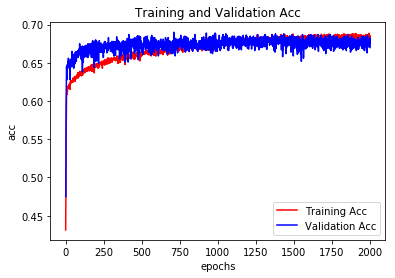

In [120]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend()
plt.show()


plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'r', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel('epochs')
plt.ylabel('acc')

plt.legend()
plt.show()


In [121]:
results = model.evaluate(x_test, y_test)
results


5000/5000 [==============================] - 0s 61us/step


[0.8157173809051513, 0.6822]

In [11]:
y_test.shape


(5000, 4)

In [16]:
y_test.sum()

av_training_set_AFP    2317
av_training_set_NTP     635
av_training_set_PC      890
av_training_set_UNK    1158
dtype: int64

In [25]:
y_test['av_training_set_AFP'].sum()/y_test.shape[0]

0.4734

so what have we learned here? well firstly, as might have been expected, this approach is better than guessing,
but not by much, and we have also learned that there are just too many damn attributes to deal with reasonably
so we will move to the autoencoder work to use in DEC - maybe we can handle the high dimesion data in that setting?
if not well, then we have stuff to think through

In [25]:
## build a fun dumb autoencoder

import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import backend as K
from keras.models import Model


k_data = kepler_data.drop(['tce_rogue_flag', 'tce_delivname', 'rowupdate', 
                           'tce_datalink_dvs', 'tce_datalink_dvr', 'tce_steff_prov', 
                           'tce_slogg_prov', 'tce_smet_prov','tce_sradius_prov', 'tce_limbdark_mod',
                           'tce_trans_mod', 'tce_eccen', 'tce_eccen_err', 'tce_longp', 'tce_longp_err'
                          ],axis=1)
# drop some columns that we will not be using
# starting with all NA columns
k_data.dropna(axis=1,how='any', inplace=True)

# drop the Autovetter stuff
autovetter_cols = ['av_vf_pc', 'av_vf_pc_err', 'av_vf_afp',
                   'av_vf_afp_err', 'av_vf_ntp', 'av_vf_ntp_err', 
                   'av_pp_pc','av_pp_afp', 'av_pp_ntp', 
                   'av_training_set', 'av_pred_class']
# drop all autovetter columns execpt the training set - as those are manually set - take as "truth"

k_data = k_data.drop(['av_vf_pc', 'av_vf_pc_err', 'av_vf_afp','av_vf_afp_err',
                           'av_vf_ntp', 'av_vf_ntp_err', 'av_pp_pc','av_pp_afp', 
                           'av_pp_ntp', 'av_pred_class'],axis=1)

col_names = k_data.columns.values

k_data = pd.get_dummies(k_data, columns=['av_training_set'])


ae_data = k_data
# update to be categorical
ae_data = ae_data.drop(['av_training_set_AFP','av_training_set_NTP','av_training_set_PC', 'av_training_set_UNK'], axis=1)
#x = k_data.drop(['rowid','kepid'], axis=1)
#x = k_data[['tce_mesmad','tce_maxmes', 'tce_minmes', 'tce_maxmesd', 'tce_minmesd', 'tce_plnt_num']]
ae_data = (ae_data - ae_data.mean()) / (ae_data.max() - ae_data.min())

In [8]:
dimensions = [100,90,70,80,60,50,40,30,20]

x = Input(shape=(ae_data.shape[1],))
h = x
for i in range(len(dimensions)):
    h = Dense(dimensions[i], activation='relu')(h)
    
encoding = Dense(10, activation='relu')(h)
y = encoding

for i in range(1,len(dimensions)+1):
    y = Dense(dimensions[-i], activation='relu')(y)
    
y = Dense(ae_data.shape[1], activation='relu')(y)

model = Model(inputs=x, outputs=y)
encoder = Model(inputs=x, outputs=h)

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.summary()

history = model.fit(ae_data, ae_data, batch_size=512, epochs=2000)

loss = history.history['loss']

epochs = range(1, len(loss)+1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 93)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               9400      
_________________________________________________________________
dense_7 (Dense)              (None, 90)                9090      
_________________________________________________________________
dense_8 (Dense)              (None, 70)                6370      
_________________________________________________________________
dense_9 (Dense)              (None, 80)                5680      
_________________________________________________________________
dense_10 (Dense)             (None, 60)                4860      
_________________________________________________________________
dense_11 (Dense)             (None, 50)                3050      
__________

20367/20367 [==============================] - 0s 16us/step - loss: 0.0100 - acc: 0.6852
Epoch 51/2000
20367/20367 [==============================] - 0s 17us/step - loss: 0.0100 - acc: 0.6935
Epoch 52/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0100 - acc: 0.6866
Epoch 53/2000
20367/20367 [==============================] - 0s 17us/step - loss: 0.0100 - acc: 0.6890
Epoch 54/2000
20367/20367 [==============================] - 0s 17us/step - loss: 0.0100 - acc: 0.6890
Epoch 55/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0100 - acc: 0.6957
Epoch 56/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0100 - acc: 0.6936
Epoch 57/2000
20367/20367 [==============================] - 0s 17us/step - loss: 0.0100 - acc: 0.6853
Epoch 58/2000
20367/20367 [==============================] - 0s 17us/step - loss: 0.0100 - acc: 0.6892
Epoch 59/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.009

20367/20367 [==============================] - 0s 16us/step - loss: 0.0098 - acc: 0.7063
Epoch 130/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0098 - acc: 0.7183
Epoch 131/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7126
Epoch 132/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7182
Epoch 133/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7237
Epoch 134/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0098 - acc: 0.7106
Epoch 135/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7124
Epoch 136/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0098 - acc: 0.6898
Epoch 137/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7126
Epoch 138/2000
20367/20367 [==============================] - 0s 16us/step - lo

20367/20367 [==============================] - 0s 16us/step - loss: 0.0098 - acc: 0.7064
Epoch 208/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0098 - acc: 0.6901
Epoch 209/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0098 - acc: 0.7053
Epoch 210/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0098 - acc: 0.7118
Epoch 211/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7177
Epoch 212/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0098 - acc: 0.7201
Epoch 213/2000
20367/20367 [==============================] - 0s 17us/step - loss: 0.0097 - acc: 0.7184
Epoch 214/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7350
Epoch 215/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7337
Epoch 216/2000
20367/20367 [==============================] - 0s 16us/step - lo

20367/20367 [==============================] - 0s 16us/step - loss: 0.0098 - acc: 0.6807
Epoch 286/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0098 - acc: 0.6897
Epoch 287/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7290
Epoch 288/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7362
Epoch 289/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7395
Epoch 290/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7389
Epoch 291/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7430
Epoch 292/2000
20367/20367 [==============================] - 0s 17us/step - loss: 0.0097 - acc: 0.7281
Epoch 293/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7222
Epoch 294/2000
20367/20367 [==============================] - 0s 15us/step - lo

KeyboardInterrupt: 

In [14]:
h

<tf.Tensor 'dense_29/Relu:0' shape=(?, 20) dtype=float32>

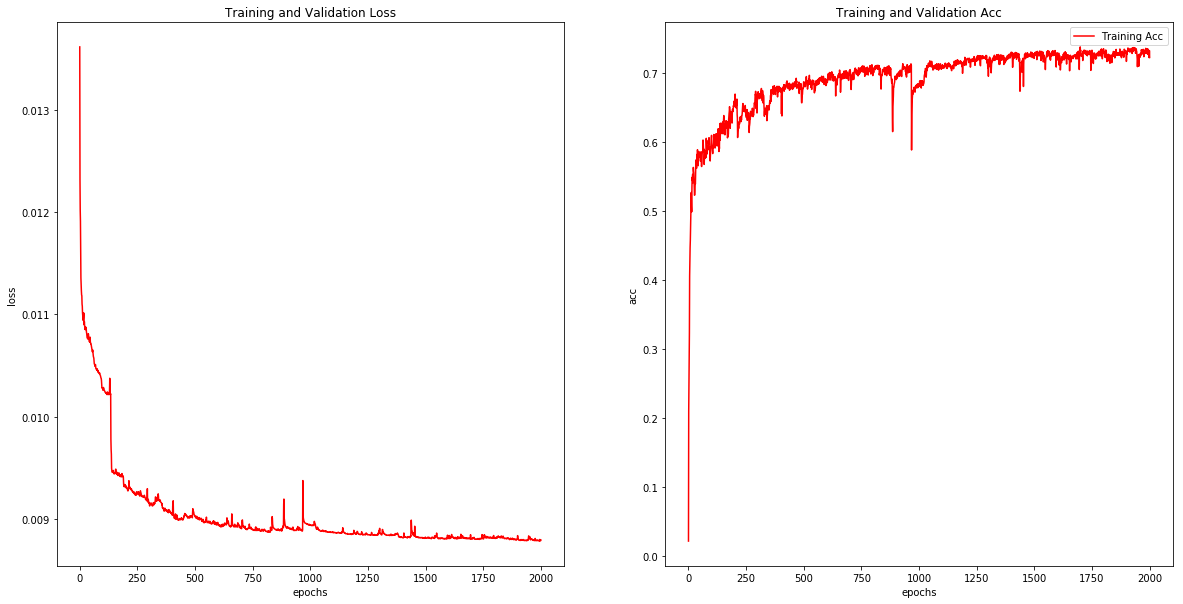

In [10]:
f,axs = plt.subplots(2,2,figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')

 
plt.subplot(1,2,2)

acc = history.history['acc']

plt.plot(epochs, acc, 'r', label='Training Acc')
plt.title('Training and Validation Acc')
plt.xlabel('epochs')
plt.ylabel('acc')

plt.legend()
plt.show()

In [10]:
# ok - so we have a basic autoencoder
# but we did not do layerwise greedy pre training
# so we need to do that layerwise greedy pretrain

from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import SGD
from keras.initializers import RandomNormal


layer_sizes = [ae_data.shape[1],100,90,80,70,60,50,40,30,20,10]

# creates the layers to greedy layerwise pretrain
# takes par
def create_layers(layer_sizes):
    autoencoders = []
    encoders = []
    decoders = []
    for i in range(1, len(layer_sizes)):
        if i == len(layer_sizes) - 1:
            act = 'linear'
        else:
            act = 'relu'
        h = Dense(layer_sizes[i], activation=act,
                  input_shape=(layer_sizes[i-1],),
                  name='encoder_%d'%i,
                  bias_initializer='zeros',
                  kernel_initializer=RandomNormal(mean=0.0, stddev=0.01, seed=None))
        encoders.append(h)
        
        rev_i = len(layer_sizes) - i
        if i == 1:
            act = 'linear'
        else:
            act = 'relu'
        d = Dense(layer_sizes[i-1], activation=act,
                 name='decoder_%d'%rev_i,
                 bias_initializer='zeros',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.01, seed=None))
        decoders.append(d)
        autoencoder = Sequential([
            Dropout(0.005, input_shape=(layer_sizes[i-1],),name='encoder_dropout_%d'%i),
            h,
            Dropout(0.005, name='decoder_dropout_%d'%rev_i),
            d
        ])
        autoencoder.compile(loss='mse', optimizer=SGD(lr=0.1, decay=0, momentum=0.9))
        autoencoders.append(autoencoder)
    return autoencoders, encoders, decoders

# greedy layer wise training
autoencoders, encoders, decoders = create_layers(layer_sizes)

encoder = Sequential(encoders)
encoder.compile(loss='mse', optimizer=SGD(lr=0.1, decay=0, momentum=0.9))
decoders.reverse()
autoencoder = Sequential(encoders + decoders)
autoencoder.compile(loss='mse', optimizer=SGD(lr=0.1, decay=0, momentum=0.9))


In [109]:
X = ae_data
current_input = X
histories =[]
for i, ae in enumerate(autoencoders):
    if i > 0:
        weights = encoders[i-1].get_weights()
        dense_layer = Dense(layer_sizes[i], input_shape=(current_input.shape[1],),
                            activation='relu', weights=weights,
                            name='encoder_dense_copy_%d'%i)
        encoder_model = Sequential([dense_layer])
        encoder_model.compile(loss='mse', optimizer=SGD(lr=0.1, decay=0, momentum=0.9))
        current_input = encoder_model.predict(current_input)
    histories.append(ae.fit(current_input, current_input,
                    batch_size=512, epochs=2000))
    
    autoencoder.layers[i].set_weights(ae.layers[1].get_weights())
    autoencoder.layers[len(autoencoder.layers)-i-1].set_weights(ae.layers[-1].get_weights())
    

Epoch 1/2000
20367/20367 [==============================] - 2s 89us/step - loss: 0.0138
Epoch 2/2000
20367/20367 [==============================] - 0s 7us/step - loss: 0.0137
Epoch 3/2000
20367/20367 [==============================] - 0s 7us/step - loss: 0.0137
Epoch 4/2000
20367/20367 [==============================] - 0s 7us/step - loss: 0.0136
Epoch 5/2000
20367/20367 [==============================] - 0s 8us/step - loss: 0.0135
Epoch 6/2000
20367/20367 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 7/2000
20367/20367 [==============================] - 0s 8us/step - loss: 0.0131
Epoch 8/2000
20367/20367 [==============================] - 0s 9us/step - loss: 0.0128
Epoch 9/2000
20367/20367 [==============================] - 0s 8us/step - loss: 0.0124
Epoch 10/2000
20367/20367 [==============================] - 0s 7us/step - loss: 0.0117
Epoch 11/2000
20367/20367 [==============================] - 0s 7us/step - loss: 0.0110
Epoch 12/2000
20367/20367 [=============

20367/20367 [==============================] - 0s 7us/step - loss: 0.0010
Epoch 187/2000
20367/20367 [==============================] - 0s 7us/step - loss: 0.0010
Epoch 188/2000
20367/20367 [==============================] - 0s 7us/step - loss: 0.0010
Epoch 189/2000
20367/20367 [==============================] - 0s 7us/step - loss: 0.0010
Epoch 190/2000
20367/20367 [==============================] - 0s 8us/step - loss: 0.0010
Epoch 191/2000
20367/20367 [==============================] - 0s 7us/step - loss: 0.0010
Epoch 192/2000
20367/20367 [==============================] - 0s 7us/step - loss: 0.0010
Epoch 193/2000
20367/20367 [==============================] - 0s 7us/step - loss: 0.0010
Epoch 194/2000
20367/20367 [==============================] - 0s 7us/step - loss: 0.0010
Epoch 195/2000
20367/20367 [==============================] - 0s 7us/step - loss: 0.0010
Epoch 196/2000
20367/20367 [==============================] - 0s 7us/step - loss: 0.0010
Epoch 197/2000
20367/20367 [========

20367/20367 [==============================] - 0s 8us/step - loss: 6.8906e-04
Epoch 363/2000
20367/20367 [==============================] - 0s 7us/step - loss: 6.8701e-04
Epoch 364/2000
20367/20367 [==============================] - 0s 7us/step - loss: 6.9119e-04
Epoch 365/2000
20367/20367 [==============================] - 0s 8us/step - loss: 6.8407e-04
Epoch 366/2000
20367/20367 [==============================] - 0s 7us/step - loss: 6.8606e-04
Epoch 367/2000
20367/20367 [==============================] - 0s 7us/step - loss: 6.8670e-04
Epoch 368/2000
20367/20367 [==============================] - 0s 7us/step - loss: 6.7767e-04
Epoch 369/2000
20367/20367 [==============================] - 0s 7us/step - loss: 6.8336e-04
Epoch 370/2000
20367/20367 [==============================] - 0s 7us/step - loss: 6.8290e-04
Epoch 371/2000
20367/20367 [==============================] - 0s 7us/step - loss: 6.8041e-04
Epoch 372/2000
20367/20367 [==============================] - 0s 7us/step - loss: 6.7

20367/20367 [==============================] - 0s 7us/step - loss: 5.0510e-04
Epoch 539/2000
20367/20367 [==============================] - 0s 7us/step - loss: 5.0006e-04
Epoch 540/2000
20367/20367 [==============================] - 0s 8us/step - loss: 4.9920e-04
Epoch 541/2000
20367/20367 [==============================] - 0s 7us/step - loss: 4.9587e-04
Epoch 542/2000
20367/20367 [==============================] - 0s 8us/step - loss: 4.9418e-04
Epoch 543/2000
20367/20367 [==============================] - 0s 7us/step - loss: 4.9429e-04
Epoch 544/2000
20367/20367 [==============================] - 0s 7us/step - loss: 4.9618e-04
Epoch 545/2000
20367/20367 [==============================] - 0s 7us/step - loss: 4.9769e-04
Epoch 546/2000
20367/20367 [==============================] - 0s 7us/step - loss: 4.9429e-04
Epoch 547/2000
20367/20367 [==============================] - 0s 7us/step - loss: 4.9121e-04
Epoch 548/2000
20367/20367 [==============================] - 0s 7us/step - loss: 4.8

20367/20367 [==============================] - 0s 8us/step - loss: 4.0246e-04
Epoch 715/2000
20367/20367 [==============================] - 0s 8us/step - loss: 4.0012e-04
Epoch 716/2000
20367/20367 [==============================] - 0s 7us/step - loss: 4.0356e-04
Epoch 717/2000
20367/20367 [==============================] - 0s 7us/step - loss: 3.9969e-04
Epoch 718/2000
20367/20367 [==============================] - 0s 7us/step - loss: 4.0012e-04
Epoch 719/2000
20367/20367 [==============================] - 0s 7us/step - loss: 3.9964e-04
Epoch 720/2000
20367/20367 [==============================] - 0s 7us/step - loss: 3.9935e-04
Epoch 721/2000
20367/20367 [==============================] - 0s 7us/step - loss: 4.0161e-04
Epoch 722/2000
20367/20367 [==============================] - 0s 8us/step - loss: 4.0057e-04
Epoch 723/2000
20367/20367 [==============================] - 0s 7us/step - loss: 3.9664e-04
Epoch 724/2000
20367/20367 [==============================] - 0s 7us/step - loss: 3.9

20367/20367 [==============================] - 0s 8us/step - loss: 3.5164e-04
Epoch 891/2000
20367/20367 [==============================] - 0s 7us/step - loss: 3.4651e-04
Epoch 892/2000
20367/20367 [==============================] - 0s 7us/step - loss: 3.5540e-04
Epoch 893/2000
20367/20367 [==============================] - 0s 7us/step - loss: 3.5651e-04
Epoch 894/2000
20367/20367 [==============================] - 0s 8us/step - loss: 3.4791e-04
Epoch 895/2000
20367/20367 [==============================] - 0s 8us/step - loss: 3.5300e-04
Epoch 896/2000
20367/20367 [==============================] - 0s 7us/step - loss: 3.5505e-04
Epoch 897/2000
20367/20367 [==============================] - 0s 8us/step - loss: 3.4842e-04
Epoch 898/2000
20367/20367 [==============================] - 0s 7us/step - loss: 3.5249e-04
Epoch 899/2000
20367/20367 [==============================] - 0s 7us/step - loss: 3.4707e-04
Epoch 900/2000
20367/20367 [==============================] - 0s 7us/step - loss: 3.5

20367/20367 [==============================] - 0s 7us/step - loss: 3.1785e-04
Epoch 1066/2000
20367/20367 [==============================] - 0s 7us/step - loss: 3.1508e-04
Epoch 1067/2000
20367/20367 [==============================] - 0s 7us/step - loss: 3.2074e-04
Epoch 1068/2000
20367/20367 [==============================] - 0s 8us/step - loss: 3.1991e-04
Epoch 1069/2000
20367/20367 [==============================] - 0s 7us/step - loss: 3.1589e-04
Epoch 1070/2000
20367/20367 [==============================] - 0s 8us/step - loss: 3.2087e-04
Epoch 1071/2000
20367/20367 [==============================] - 0s 8us/step - loss: 3.1904e-04
Epoch 1072/2000
20367/20367 [==============================] - 0s 8us/step - loss: 3.1454e-04
Epoch 1073/2000
20367/20367 [==============================] - 0s 7us/step - loss: 3.1795e-04
Epoch 1074/2000
20367/20367 [==============================] - 0s 8us/step - loss: 3.1418e-04
Epoch 1075/2000
20367/20367 [==============================] - 0s 7us/step -

20367/20367 [==============================] - 0s 8us/step - loss: 2.9488e-04
Epoch 1240/2000
20367/20367 [==============================] - 0s 8us/step - loss: 2.9478e-04
Epoch 1241/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.9564e-04
Epoch 1242/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.9490e-04
Epoch 1243/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.9649e-04
Epoch 1244/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.9404e-04
Epoch 1245/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.9572e-04
Epoch 1246/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.9290e-04
Epoch 1247/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.9118e-04
Epoch 1248/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.9436e-04
Epoch 1249/2000
20367/20367 [==============================] - 0s 7us/step -

20367/20367 [==============================] - 0s 7us/step - loss: 2.7638e-04
Epoch 1414/2000
20367/20367 [==============================] - 0s 8us/step - loss: 2.7740e-04
Epoch 1415/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.8127e-04
Epoch 1416/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.8055e-04
Epoch 1417/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.7562e-04
Epoch 1418/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.8014e-04
Epoch 1419/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.7539e-04
Epoch 1420/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.7869e-04
Epoch 1421/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.7900e-04
Epoch 1422/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.7740e-04
Epoch 1423/2000
20367/20367 [==============================] - 0s 8us/step -

20367/20367 [==============================] - 0s 7us/step - loss: 2.6736e-04
Epoch 1588/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.6932e-04
Epoch 1589/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.6612e-04
Epoch 1590/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.6898e-04
Epoch 1591/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.6709e-04
Epoch 1592/2000
20367/20367 [==============================] - 0s 8us/step - loss: 2.6870e-04
Epoch 1593/2000
20367/20367 [==============================] - 0s 8us/step - loss: 2.6799e-04
Epoch 1594/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.6945e-04
Epoch 1595/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.6527e-04
Epoch 1596/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.6971e-04
Epoch 1597/2000
20367/20367 [==============================] - 0s 7us/step -

20367/20367 [==============================] - 0s 8us/step - loss: 2.5619e-04
Epoch 1762/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.4962e-04
Epoch 1763/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.5679e-04
Epoch 1764/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.5481e-04
Epoch 1765/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.5658e-04
Epoch 1766/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.5384e-04
Epoch 1767/2000
20367/20367 [==============================] - 0s 8us/step - loss: 2.5383e-04
Epoch 1768/2000
20367/20367 [==============================] - 0s 8us/step - loss: 2.5394e-04
Epoch 1769/2000
20367/20367 [==============================] - 0s 8us/step - loss: 2.5302e-04
Epoch 1770/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.5711e-04
Epoch 1771/2000
20367/20367 [==============================] - 0s 7us/step -

20367/20367 [==============================] - 0s 8us/step - loss: 2.4433e-04
Epoch 1936/2000
20367/20367 [==============================] - 0s 8us/step - loss: 2.4274e-04
Epoch 1937/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.4460e-04
Epoch 1938/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.3824e-04
Epoch 1939/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.3983e-04
Epoch 1940/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.4635e-04
Epoch 1941/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.4053e-04
Epoch 1942/2000
20367/20367 [==============================] - 0s 8us/step - loss: 2.4412e-04
Epoch 1943/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.4386e-04
Epoch 1944/2000
20367/20367 [==============================] - 0s 7us/step - loss: 2.4115e-04
Epoch 1945/2000
20367/20367 [==============================] - 0s 8us/step -

20367/20367 [==============================] - 0s 5us/step - loss: 0.0036
Epoch 117/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0036
Epoch 118/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0036
Epoch 119/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0036
Epoch 120/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0036
Epoch 121/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0036
Epoch 122/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0036
Epoch 123/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0036
Epoch 124/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0036
Epoch 125/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0036
Epoch 126/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0036
Epoch 127/2000
20367/20367 [========

20367/20367 [==============================] - 0s 5us/step - loss: 0.0030
Epoch 301/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0030
Epoch 302/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0030
Epoch 303/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0030
Epoch 304/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0030
Epoch 305/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0030
Epoch 306/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0030
Epoch 307/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0030
Epoch 308/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0030
Epoch 309/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0030
Epoch 310/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0030
Epoch 311/2000
20367/20367 [========

20367/20367 [==============================] - 0s 5us/step - loss: 0.0028
Epoch 485/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0028
Epoch 486/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0028
Epoch 487/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0028
Epoch 488/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0028
Epoch 489/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0028
Epoch 490/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0028
Epoch 491/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0028
Epoch 492/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0028
Epoch 493/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0028
Epoch 494/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0028
Epoch 495/2000
20367/20367 [========

20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 669/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 670/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 671/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 672/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 673/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 674/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 675/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 676/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 677/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 678/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 679/2000
20367/20367 [========

20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 853/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 854/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 855/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 856/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 857/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 858/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 859/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 860/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0026
Epoch 861/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 862/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 863/2000
20367/20367 [========

20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 1036/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0026
Epoch 1037/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 1038/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 1039/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 1040/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 1041/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 1042/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0026
Epoch 1043/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 1044/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 1045/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 1046/2000
20367/2036

20367/20367 [==============================] - 0s 5us/step - loss: 0.0020
Epoch 1218/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0020
Epoch 1219/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0020
Epoch 1220/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0020
Epoch 1221/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0020
Epoch 1222/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0020
Epoch 1223/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0020
Epoch 1224/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0020
Epoch 1225/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0020
Epoch 1226/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0020
Epoch 1227/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0020
Epoch 1228/2000
20367/2036

20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1400/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0017
Epoch 1401/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1402/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1403/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1404/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1405/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1406/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1407/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0017
Epoch 1408/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1409/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1410/2000
20367/2036

20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1582/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1583/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1584/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1585/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1586/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1587/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1588/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1589/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1590/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1591/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1592/2000
20367/2036

20367/20367 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 1764/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 1765/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 1766/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 1767/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0012
Epoch 1768/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0012
Epoch 1769/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 1770/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 1771/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 1772/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 1773/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 1774/2000
20367/2036

20367/20367 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 1946/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 1947/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 1948/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 1949/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0012
Epoch 1950/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 1951/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0012
Epoch 1952/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 1953/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 1954/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 1955/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 1956/2000
20367/2036

20367/20367 [==============================] - 0s 5us/step - loss: 0.0061
Epoch 38/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0059
Epoch 39/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0058
Epoch 40/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0055
Epoch 41/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0052
Epoch 42/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 43/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0050
Epoch 44/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0048
Epoch 45/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0047
Epoch 46/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0046
Epoch 47/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0046
Epoch 48/2000
20367/20367 [===================

20367/20367 [==============================] - 0s 5us/step - loss: 8.0440e-04
Epoch 220/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.0153e-04
Epoch 221/2000
20367/20367 [==============================] - 0s 5us/step - loss: 7.9839e-04
Epoch 222/2000
20367/20367 [==============================] - 0s 5us/step - loss: 7.9564e-04
Epoch 223/2000
20367/20367 [==============================] - 0s 5us/step - loss: 7.9095e-04
Epoch 224/2000
20367/20367 [==============================] - 0s 5us/step - loss: 7.8590e-04
Epoch 225/2000
20367/20367 [==============================] - 0s 5us/step - loss: 7.8697e-04
Epoch 226/2000
20367/20367 [==============================] - 0s 5us/step - loss: 7.8215e-04
Epoch 227/2000
20367/20367 [==============================] - 0s 5us/step - loss: 7.7639e-04
Epoch 228/2000
20367/20367 [==============================] - 0s 5us/step - loss: 7.7383e-04
Epoch 229/2000
20367/20367 [==============================] - 0s 5us/step - loss: 7.7

20367/20367 [==============================] - 0s 5us/step - loss: 4.2266e-04
Epoch 396/2000
20367/20367 [==============================] - 0s 5us/step - loss: 4.2189e-04
Epoch 397/2000
20367/20367 [==============================] - 0s 5us/step - loss: 4.1875e-04
Epoch 398/2000
20367/20367 [==============================] - 0s 5us/step - loss: 4.1858e-04
Epoch 399/2000
20367/20367 [==============================] - 0s 5us/step - loss: 4.1844e-04
Epoch 400/2000
20367/20367 [==============================] - 0s 5us/step - loss: 4.1715e-04
Epoch 401/2000
20367/20367 [==============================] - 0s 5us/step - loss: 4.1373e-04
Epoch 402/2000
20367/20367 [==============================] - 0s 5us/step - loss: 4.1124e-04
Epoch 403/2000
20367/20367 [==============================] - 0s 5us/step - loss: 4.1165e-04
Epoch 404/2000
20367/20367 [==============================] - 0s 5us/step - loss: 4.1018e-04
Epoch 405/2000
20367/20367 [==============================] - 0s 5us/step - loss: 4.0

20367/20367 [==============================] - 0s 5us/step - loss: 2.5033e-04
Epoch 572/2000
20367/20367 [==============================] - 0s 5us/step - loss: 2.5338e-04
Epoch 573/2000
20367/20367 [==============================] - 0s 5us/step - loss: 2.5226e-04
Epoch 574/2000
20367/20367 [==============================] - 0s 5us/step - loss: 2.5017e-04
Epoch 575/2000
20367/20367 [==============================] - 0s 5us/step - loss: 2.4936e-04
Epoch 576/2000
20367/20367 [==============================] - 0s 5us/step - loss: 2.5090e-04
Epoch 577/2000
20367/20367 [==============================] - 0s 5us/step - loss: 2.4804e-04
Epoch 578/2000
20367/20367 [==============================] - 0s 5us/step - loss: 2.4831e-04
Epoch 579/2000
20367/20367 [==============================] - 0s 5us/step - loss: 2.4588e-04
Epoch 580/2000
20367/20367 [==============================] - 0s 5us/step - loss: 2.5059e-04
Epoch 581/2000
20367/20367 [==============================] - 0s 5us/step - loss: 2.4

20367/20367 [==============================] - 0s 6us/step - loss: 1.7980e-04
Epoch 748/2000
20367/20367 [==============================] - 0s 6us/step - loss: 1.8044e-04
Epoch 749/2000
20367/20367 [==============================] - 0s 6us/step - loss: 1.7988e-04
Epoch 750/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.7935e-04
Epoch 751/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.8003e-04
Epoch 752/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.8043e-04
Epoch 753/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.8224e-04
Epoch 754/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.7742e-04
Epoch 755/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.7842e-04
Epoch 756/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.7635e-04
Epoch 757/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.7

20367/20367 [==============================] - 0s 5us/step - loss: 1.4705e-04
Epoch 924/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.4752e-04
Epoch 925/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.4845e-04
Epoch 926/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.5034e-04
Epoch 927/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.4786e-04
Epoch 928/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.4262e-04
Epoch 929/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.4547e-04
Epoch 930/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.4377e-04
Epoch 931/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.4639e-04
Epoch 932/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.4782e-04
Epoch 933/2000
20367/20367 [==============================] - 0s 4us/step - loss: 1.4

20367/20367 [==============================] - 0s 5us/step - loss: 1.3684e-04
Epoch 1012/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3445e-04
Epoch 1013/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3381e-04
Epoch 1014/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3641e-04
Epoch 1015/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3633e-04
Epoch 1016/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3592e-04
Epoch 1017/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3331e-04
Epoch 1018/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3540e-04
Epoch 1019/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3699e-04
Epoch 1020/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3347e-04
Epoch 1021/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 5us/step - loss: 1.1832e-04
Epoch 1186/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.1882e-04
Epoch 1187/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.1849e-04
Epoch 1188/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.1848e-04
Epoch 1189/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.1748e-04
Epoch 1190/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.1820e-04
Epoch 1191/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.1724e-04
Epoch 1192/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.1960e-04
Epoch 1193/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.1825e-04
Epoch 1194/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.1713e-04
Epoch 1195/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 5us/step - loss: 1.0791e-04
Epoch 1360/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.1206e-04
Epoch 1361/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.0981e-04
Epoch 1362/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.1039e-04
Epoch 1363/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.1004e-04
Epoch 1364/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.1149e-04
Epoch 1365/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.1068e-04
Epoch 1366/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.1053e-04
Epoch 1367/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.1313e-04
Epoch 1368/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.1379e-04
Epoch 1369/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 5us/step - loss: 1.0740e-04
Epoch 1534/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.0777e-04
Epoch 1535/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.0536e-04
Epoch 1536/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.0685e-04
Epoch 1537/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.0597e-04
Epoch 1538/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.0497e-04
Epoch 1539/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.0655e-04
Epoch 1540/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.0733e-04
Epoch 1541/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.0568e-04
Epoch 1542/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.0412e-04
Epoch 1543/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 5us/step - loss: 1.0434e-04
Epoch 1708/2000
20367/20367 [==============================] - 0s 4us/step - loss: 1.0164e-04
Epoch 1709/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.0291e-04
Epoch 1710/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.0294e-04
Epoch 1711/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.0407e-04
Epoch 1712/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.0095e-04
Epoch 1713/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.0266e-04
Epoch 1714/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9470e-05
Epoch 1715/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.0219e-04
Epoch 1716/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.0185e-04
Epoch 1717/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 5us/step - loss: 9.8175e-05
Epoch 1882/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.8013e-05
Epoch 1883/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.0000e-04
Epoch 1884/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.7970e-05
Epoch 1885/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.8640e-05
Epoch 1886/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9654e-05
Epoch 1887/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.8959e-05
Epoch 1888/2000
20367/20367 [==============================] - 0s 6us/step - loss: 9.9851e-05
Epoch 1889/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.7279e-05
Epoch 1890/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.8825e-05
Epoch 1891/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 4us/step - loss: 0.0036
Epoch 60/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0036
Epoch 61/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0035
Epoch 62/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0035
Epoch 63/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0034
Epoch 64/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0034
Epoch 65/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 66/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 67/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0032
Epoch 68/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0032
Epoch 69/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0031
Epoch 70/2000
20367/20367 [===================

20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 244/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 245/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 246/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 247/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 248/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 249/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 250/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 251/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 252/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 253/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 254/2000
20367/20367 [========

20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 428/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 429/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 430/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 431/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 432/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 433/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 434/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 435/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 436/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 437/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 438/2000
20367/20367 [========

20367/20367 [==============================] - 0s 5us/step - loss: 9.1367e-04
Epoch 606/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.1419e-04
Epoch 607/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.1489e-04
Epoch 608/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.1281e-04
Epoch 609/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.1445e-04
Epoch 610/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.1276e-04
Epoch 611/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.1025e-04
Epoch 612/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.1253e-04
Epoch 613/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.0940e-04
Epoch 614/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.1096e-04
Epoch 615/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.1

20367/20367 [==============================] - 0s 5us/step - loss: 8.6482e-04
Epoch 782/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.6486e-04
Epoch 783/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.6278e-04
Epoch 784/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.6333e-04
Epoch 785/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.6464e-04
Epoch 786/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.6230e-04
Epoch 787/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.6242e-04
Epoch 788/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.5667e-04
Epoch 789/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.6447e-04
Epoch 790/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.6308e-04
Epoch 791/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.6

20367/20367 [==============================] - 0s 4us/step - loss: 8.3703e-04
Epoch 958/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.3472e-04
Epoch 959/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.3404e-04
Epoch 960/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.3584e-04
Epoch 961/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.3650e-04
Epoch 962/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.3617e-04
Epoch 963/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.3691e-04
Epoch 964/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.3790e-04
Epoch 965/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.3530e-04
Epoch 966/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.3492e-04
Epoch 967/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.3

20367/20367 [==============================] - 0s 5us/step - loss: 8.1952e-04
Epoch 1132/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2151e-04
Epoch 1133/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2393e-04
Epoch 1134/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2388e-04
Epoch 1135/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2292e-04
Epoch 1136/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2512e-04
Epoch 1137/2000
20367/20367 [==============================] - 0s 6us/step - loss: 8.2373e-04
Epoch 1138/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1971e-04
Epoch 1139/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2240e-04
Epoch 1140/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2072e-04
Epoch 1141/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 5us/step - loss: 8.1849e-04
Epoch 1306/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1836e-04
Epoch 1307/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1900e-04
Epoch 1308/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1677e-04
Epoch 1309/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1619e-04
Epoch 1310/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2095e-04
Epoch 1311/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1689e-04
Epoch 1312/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1792e-04
Epoch 1313/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1634e-04
Epoch 1314/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1709e-04
Epoch 1315/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 5us/step - loss: 8.1561e-04
Epoch 1480/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1562e-04
Epoch 1481/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1714e-04
Epoch 1482/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1544e-04
Epoch 1483/2000
20367/20367 [==============================] - 0s 6us/step - loss: 8.1304e-04
Epoch 1484/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1685e-04
Epoch 1485/2000
20367/20367 [==============================] - 0s 4us/step - loss: 8.1297e-04
Epoch 1486/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1797e-04
Epoch 1487/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1510e-04
Epoch 1488/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1415e-04
Epoch 1489/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 5us/step - loss: 8.1398e-04
Epoch 1654/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1368e-04
Epoch 1655/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1327e-04
Epoch 1656/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1472e-04
Epoch 1657/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1495e-04
Epoch 1658/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1299e-04
Epoch 1659/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1404e-04
Epoch 1660/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1046e-04
Epoch 1661/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1331e-04
Epoch 1662/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1417e-04
Epoch 1663/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 5us/step - loss: 8.1096e-04
Epoch 1828/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1032e-04
Epoch 1829/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1290e-04
Epoch 1830/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1230e-04
Epoch 1831/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1470e-04
Epoch 1832/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1294e-04
Epoch 1833/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1119e-04
Epoch 1834/2000
20367/20367 [==============================] - 0s 6us/step - loss: 8.1310e-04
Epoch 1835/2000
20367/20367 [==============================] - 0s 6us/step - loss: 8.1426e-04
Epoch 1836/2000
20367/20367 [==============================] - 0s 6us/step - loss: 8.1437e-04
Epoch 1837/2000
20367/20367 [==============================] - 0s 6us/step -

20367/20367 [==============================] - 2s 78us/step - loss: 0.0196
Epoch 2/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0109
Epoch 4/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 5/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0107
Epoch 6/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0105
Epoch 7/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 8/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0102
Epoch 9/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0100
Epoch 10/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0097
Epoch 11/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0095
Epoch 12/2000
20367/20367 [==========================

20367/20367 [==============================] - 0s 5us/step - loss: 0.0032
Epoch 187/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0032
Epoch 188/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0032
Epoch 189/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0032
Epoch 190/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0032
Epoch 191/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0032
Epoch 192/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0032
Epoch 193/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0032
Epoch 194/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0032
Epoch 195/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0032
Epoch 196/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0032
Epoch 197/2000
20367/20367 [========

20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 371/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 372/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 373/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 374/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 375/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 376/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 377/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 378/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 379/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 380/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 381/2000
20367/20367 [========

20367/20367 [==============================] - 0s 5us/step - loss: 0.0025
Epoch 555/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0025
Epoch 556/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0025
Epoch 557/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0025
Epoch 558/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0025
Epoch 559/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0025
Epoch 560/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0025
Epoch 561/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0025
Epoch 562/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0025
Epoch 563/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0025
Epoch 564/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0025
Epoch 565/2000
20367/20367 [========

20367/20367 [==============================] - 0s 5us/step - loss: 0.0025
Epoch 739/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0025
Epoch 740/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0025
Epoch 741/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0025
Epoch 742/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0025
Epoch 743/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0025
Epoch 744/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 745/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0025
Epoch 746/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0025
Epoch 747/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0025
Epoch 748/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0025
Epoch 749/2000
20367/20367 [========

20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 923/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 924/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 925/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 926/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 927/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 928/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 929/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 930/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 931/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 932/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 933/2000
20367/20367 [========

20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 1015/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 1016/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 1017/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 1018/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 1019/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 1020/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 1021/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 1022/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 1023/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 1024/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 1025/2000
20367/2036

20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1197/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1198/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1199/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1200/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1201/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1202/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1203/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1204/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1205/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1206/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1207/2000
20367/2036

20367/20367 [==============================] - 0s 4us/step - loss: 0.0021
Epoch 1379/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1380/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1381/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1382/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1383/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1384/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1385/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1386/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1387/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1388/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1389/2000
20367/2036

20367/20367 [==============================] - 0s 4us/step - loss: 0.0021
Epoch 1561/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1562/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1563/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1564/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1565/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1566/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1567/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1568/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1569/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1570/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1571/2000
20367/2036

20367/20367 [==============================] - 0s 4us/step - loss: 0.0021
Epoch 1743/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1744/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1745/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1746/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0021
Epoch 1747/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1748/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1749/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1750/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0021
Epoch 1751/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1752/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1753/2000
20367/2036

20367/20367 [==============================] - 0s 4us/step - loss: 0.0021
Epoch 1925/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1926/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1927/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1928/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1929/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1930/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1931/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1932/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1933/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1934/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1935/2000
20367/2036

20367/20367 [==============================] - 0s 4us/step - loss: 0.0019
Epoch 109/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0019
Epoch 110/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0019
Epoch 111/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0018
Epoch 112/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0018
Epoch 113/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0018
Epoch 114/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0018
Epoch 115/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0018
Epoch 116/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 117/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 118/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 119/2000
20367/20367 [========

20367/20367 [==============================] - 0s 4us/step - loss: 9.8330e-04
Epoch 201/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.7625e-04
Epoch 202/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.7237e-04
Epoch 203/2000
20367/20367 [==============================] - 0s 4us/step - loss: 9.6473e-04
Epoch 204/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.5711e-04
Epoch 205/2000
20367/20367 [==============================] - 0s 4us/step - loss: 9.5391e-04
Epoch 206/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.4748e-04
Epoch 207/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.4298e-04
Epoch 208/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.3837e-04
Epoch 209/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.3329e-04
Epoch 210/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.2

20367/20367 [==============================] - 0s 4us/step - loss: 3.6129e-04
Epoch 377/2000
20367/20367 [==============================] - 0s 5us/step - loss: 3.5894e-04
Epoch 378/2000
20367/20367 [==============================] - 0s 4us/step - loss: 3.6145e-04
Epoch 379/2000
20367/20367 [==============================] - 0s 5us/step - loss: 3.5991e-04
Epoch 380/2000
20367/20367 [==============================] - 0s 5us/step - loss: 3.5630e-04
Epoch 381/2000
20367/20367 [==============================] - 0s 4us/step - loss: 3.5813e-04
Epoch 382/2000
20367/20367 [==============================] - 0s 5us/step - loss: 3.5426e-04
Epoch 383/2000
20367/20367 [==============================] - 0s 4us/step - loss: 3.4868e-04
Epoch 384/2000
20367/20367 [==============================] - 0s 5us/step - loss: 3.5176e-04
Epoch 385/2000
20367/20367 [==============================] - 0s 5us/step - loss: 3.4480e-04
Epoch 386/2000
20367/20367 [==============================] - 0s 5us/step - loss: 3.3

20367/20367 [==============================] - 0s 5us/step - loss: 2.1092e-04
Epoch 553/2000
20367/20367 [==============================] - 0s 5us/step - loss: 2.1779e-04
Epoch 554/2000
20367/20367 [==============================] - 0s 5us/step - loss: 2.0798e-04
Epoch 555/2000
20367/20367 [==============================] - 0s 5us/step - loss: 2.1467e-04
Epoch 556/2000
20367/20367 [==============================] - 0s 5us/step - loss: 2.1031e-04
Epoch 557/2000
20367/20367 [==============================] - 0s 5us/step - loss: 2.1210e-04
Epoch 558/2000
20367/20367 [==============================] - 0s 5us/step - loss: 2.1430e-04
Epoch 559/2000
20367/20367 [==============================] - 0s 5us/step - loss: 2.0688e-04
Epoch 560/2000
20367/20367 [==============================] - 0s 5us/step - loss: 2.1489e-04
Epoch 561/2000
20367/20367 [==============================] - 0s 4us/step - loss: 2.0573e-04
Epoch 562/2000
20367/20367 [==============================] - 0s 5us/step - loss: 2.1

20367/20367 [==============================] - 0s 4us/step - loss: 1.6649e-04
Epoch 729/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.6972e-04
Epoch 730/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.7077e-04
Epoch 731/2000
20367/20367 [==============================] - 0s 4us/step - loss: 1.6119e-04
Epoch 732/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.6981e-04
Epoch 733/2000
20367/20367 [==============================] - 0s 4us/step - loss: 1.6352e-04
Epoch 734/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.6993e-04
Epoch 735/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.6840e-04
Epoch 736/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.6952e-04
Epoch 737/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.6747e-04
Epoch 738/2000
20367/20367 [==============================] - 0s 4us/step - loss: 1.6

20367/20367 [==============================] - 0s 5us/step - loss: 1.3816e-04
Epoch 905/2000
20367/20367 [==============================] - 0s 4us/step - loss: 1.4421e-04
Epoch 906/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.4244e-04
Epoch 907/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.4375e-04
Epoch 908/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.4072e-04
Epoch 909/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.4672e-04
Epoch 910/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.4731e-04
Epoch 911/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3780e-04
Epoch 912/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.4552e-04
Epoch 913/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.4110e-04
Epoch 914/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.4

20367/20367 [==============================] - 0s 5us/step - loss: 1.3229e-04
Epoch 1080/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2901e-04
Epoch 1081/2000
20367/20367 [==============================] - 0s 4us/step - loss: 1.3080e-04
Epoch 1082/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3602e-04
Epoch 1083/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3276e-04
Epoch 1084/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2925e-04
Epoch 1085/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3044e-04
Epoch 1086/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3129e-04
Epoch 1087/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3268e-04
Epoch 1088/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3371e-04
Epoch 1089/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 4us/step - loss: 1.3176e-04
Epoch 1254/2000
20367/20367 [==============================] - 0s 4us/step - loss: 1.2639e-04
Epoch 1255/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2729e-04
Epoch 1256/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2788e-04
Epoch 1257/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3477e-04
Epoch 1258/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3346e-04
Epoch 1259/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3205e-04
Epoch 1260/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3280e-04
Epoch 1261/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3230e-04
Epoch 1262/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2941e-04
Epoch 1263/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 4us/step - loss: 1.2524e-04
Epoch 1428/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3417e-04
Epoch 1429/2000
20367/20367 [==============================] - 0s 4us/step - loss: 1.3011e-04
Epoch 1430/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2347e-04
Epoch 1431/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2971e-04
Epoch 1432/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2697e-04
Epoch 1433/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2812e-04
Epoch 1434/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3494e-04
Epoch 1435/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3065e-04
Epoch 1436/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3005e-04
Epoch 1437/2000
20367/20367 [==============================] - 0s 4us/step -

20367/20367 [==============================] - 0s 5us/step - loss: 1.2307e-04
Epoch 1602/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2531e-04
Epoch 1603/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2736e-04
Epoch 1604/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2847e-04
Epoch 1605/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2364e-04
Epoch 1606/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2879e-04
Epoch 1607/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2977e-04
Epoch 1608/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2954e-04
Epoch 1609/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.3130e-04
Epoch 1610/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2914e-04
Epoch 1611/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 4us/step - loss: 1.2397e-04
Epoch 1776/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2709e-04
Epoch 1777/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2361e-04
Epoch 1778/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2219e-04
Epoch 1779/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2677e-04
Epoch 1780/2000
20367/20367 [==============================] - 0s 4us/step - loss: 1.2466e-04
Epoch 1781/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2652e-04
Epoch 1782/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2141e-04
Epoch 1783/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2512e-04
Epoch 1784/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2741e-04
Epoch 1785/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 4us/step - loss: 1.2017e-04
Epoch 1950/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2030e-04
Epoch 1951/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2097e-04
Epoch 1952/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2145e-04
Epoch 1953/2000
20367/20367 [==============================] - 0s 4us/step - loss: 1.2625e-04
Epoch 1954/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2189e-04
Epoch 1955/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2590e-04
Epoch 1956/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2205e-04
Epoch 1957/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2130e-04
Epoch 1958/2000
20367/20367 [==============================] - 0s 5us/step - loss: 1.2471e-04
Epoch 1959/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 131/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 132/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 133/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 134/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 135/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 136/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 137/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 138/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0026
Epoch 139/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0026
Epoch 140/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0025
Epoch 141/2000
20367/20367 [========

20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 315/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 316/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 317/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 318/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 319/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 320/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 321/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 322/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 323/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 324/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 325/2000
20367/20367 [========

20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 499/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 500/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 501/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 502/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 503/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 504/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 505/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 506/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 507/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 508/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 509/2000
20367/20367 [========

20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 683/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 684/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 685/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 686/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 687/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0010
Epoch 688/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 689/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 690/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 691/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 692/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 693/2000
20367/20367 [========

20367/20367 [==============================] - 0s 4us/step - loss: 0.0010
Epoch 867/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 868/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 869/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 870/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 871/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 872/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 873/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 874/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 875/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0010
Epoch 876/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9648e-04
Epoch 877/2000
20367/20367 [====

20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 1048/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9734e-04
Epoch 1049/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9984e-04
Epoch 1050/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 1051/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 1052/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 1053/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 1054/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 1055/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9403e-04
Epoch 1056/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 1057/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9519e-04
Epoch 1058

20367/20367 [==============================] - 0s 4us/step - loss: 9.9482e-04
Epoch 1224/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9752e-04
Epoch 1225/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.8762e-04
Epoch 1226/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9913e-04
Epoch 1227/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9304e-04
Epoch 1228/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 1229/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9941e-04
Epoch 1230/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9644e-04
Epoch 1231/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 1232/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 1233/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.001

20367/20367 [==============================] - 0s 5us/step - loss: 9.9725e-04
Epoch 1312/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9473e-04
Epoch 1313/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 1314/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9025e-04
Epoch 1315/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0010
Epoch 1316/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9935e-04
Epoch 1317/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.8784e-04
Epoch 1318/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9868e-04
Epoch 1319/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9883e-04
Epoch 1320/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9767e-04
Epoch 1321/2000
20367/20367 [==============================] - 0s 4us/step - loss: 9

20367/20367 [==============================] - 0s 5us/step - loss: 9.8800e-04
Epoch 1486/2000
20367/20367 [==============================] - 0s 4us/step - loss: 9.9359e-04
Epoch 1487/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9627e-04
Epoch 1488/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9454e-04
Epoch 1489/2000
20367/20367 [==============================] - 0s 4us/step - loss: 9.8824e-04
Epoch 1490/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9433e-04
Epoch 1491/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9585e-04
Epoch 1492/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9579e-04
Epoch 1493/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.8830e-04
Epoch 1494/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9297e-04
Epoch 1495/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 4us/step - loss: 9.9798e-04
Epoch 1660/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.8815e-04
Epoch 1661/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9100e-04
Epoch 1662/2000
20367/20367 [==============================] - 0s 4us/step - loss: 9.9138e-04
Epoch 1663/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9304e-04
Epoch 1664/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.8914e-04
Epoch 1665/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9170e-04
Epoch 1666/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.8742e-04
Epoch 1667/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.8597e-04
Epoch 1668/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9754e-04
Epoch 1669/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 4us/step - loss: 9.8683e-04
Epoch 1834/2000
20367/20367 [==============================] - 0s 4us/step - loss: 9.8605e-04
Epoch 1835/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.8589e-04
Epoch 1836/2000
20367/20367 [==============================] - 0s 4us/step - loss: 9.8587e-04
Epoch 1837/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.8909e-04
Epoch 1838/2000
20367/20367 [==============================] - 0s 4us/step - loss: 9.9355e-04
Epoch 1839/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9037e-04
Epoch 1840/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.8750e-04
Epoch 1841/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.8916e-04
Epoch 1842/2000
20367/20367 [==============================] - 0s 5us/step - loss: 9.9551e-04
Epoch 1843/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 5us/step - loss: 0.0126
Epoch 8/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0124
Epoch 9/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 10/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0120
Epoch 11/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0117
Epoch 12/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0113
Epoch 13/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0110
Epoch 14/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0107
Epoch 15/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 16/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 17/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0101
Epoch 18/2000
20367/20367 [=====================

20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 193/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 194/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 195/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 196/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0024
Epoch 197/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0024
Epoch 198/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0024
Epoch 199/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0023
Epoch 200/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0023
Epoch 201/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0023
Epoch 202/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0023
Epoch 203/2000
20367/20367 [========

20367/20367 [==============================] - 0s 5us/step - loss: 0.0015
Epoch 377/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0015
Epoch 378/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0015
Epoch 379/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0015
Epoch 380/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0015
Epoch 381/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0015
Epoch 382/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0015
Epoch 383/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0015
Epoch 384/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0015
Epoch 385/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0015
Epoch 386/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0015
Epoch 387/2000
20367/20367 [========

20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 561/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 562/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 563/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 564/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 565/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 566/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 567/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 568/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 569/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 570/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 571/2000
20367/20367 [========

20367/20367 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 745/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0014
Epoch 746/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 747/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 748/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 749/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 750/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 751/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 752/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 753/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 754/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 755/2000
20367/20367 [========

20367/20367 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 929/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 930/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 931/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 932/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 933/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 934/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 935/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 936/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 937/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 938/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 939/2000
20367/20367 [========

Epoch 1020/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1021/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1022/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1023/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1024/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1025/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1026/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1027/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1028/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 1029/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 1030/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1031

20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1112/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0013
Epoch 1113/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0013
Epoch 1114/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1115/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1116/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1117/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1118/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0013
Epoch 1119/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0013
Epoch 1120/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1121/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1122/2000
20367/2036

20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1294/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1295/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1296/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1297/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1298/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1299/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1300/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1301/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1302/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1303/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1304/2000
20367/2036

20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1476/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1477/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0013
Epoch 1478/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1479/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 1480/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1481/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 1482/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1483/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1484/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1485/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 1486/2000
20367/2036

20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1658/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0013
Epoch 1659/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1660/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1661/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1662/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1663/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1664/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1665/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 1666/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1667/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 1668/2000
20367/2036

20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1840/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 1841/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1842/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 1843/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1844/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1845/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1846/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1847/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0013
Epoch 1848/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0013
Epoch 1849/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0013
Epoch 1850/2000
20367/2036

20367/20367 [==============================] - 0s 5us/step - loss: 0.0112
Epoch 22/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0111
Epoch 23/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0111
Epoch 24/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0110
Epoch 25/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0109
Epoch 26/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0108
Epoch 27/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0107
Epoch 28/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0106
Epoch 29/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0105
Epoch 30/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0104
Epoch 31/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0102
Epoch 32/2000
20367/20367 [===================

20367/20367 [==============================] - 0s 5us/step - loss: 0.0030
Epoch 115/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0030
Epoch 116/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0029
Epoch 117/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0029
Epoch 118/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0029
Epoch 119/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0029
Epoch 120/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0028
Epoch 121/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0028
Epoch 122/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0028
Epoch 123/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0028
Epoch 124/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 125/2000
20367/20367 [========

20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 299/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 300/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 301/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 302/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 303/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 304/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 305/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 306/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 307/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 308/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 309/2000
20367/20367 [========

20367/20367 [==============================] - 0s 5us/step - loss: 8.3773e-04
Epoch 476/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.4839e-04
Epoch 477/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.4618e-04
Epoch 478/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.5533e-04
Epoch 479/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.4649e-04
Epoch 480/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.4043e-04
Epoch 481/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.5113e-04
Epoch 482/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.3234e-04
Epoch 483/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.4083e-04
Epoch 484/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.5446e-04
Epoch 485/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.4

20367/20367 [==============================] - 0s 5us/step - loss: 8.1886e-04
Epoch 652/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.3764e-04
Epoch 653/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2785e-04
Epoch 654/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2746e-04
Epoch 655/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.3577e-04
Epoch 656/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2653e-04
Epoch 657/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1983e-04
Epoch 658/2000
20367/20367 [==============================] - 0s 4us/step - loss: 8.1969e-04
Epoch 659/2000
20367/20367 [==============================] - 0s 4us/step - loss: 8.2980e-04
Epoch 660/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.3257e-04
Epoch 661/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.3

20367/20367 [==============================] - 0s 6us/step - loss: 8.1747e-04
Epoch 828/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2213e-04
Epoch 829/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1940e-04
Epoch 830/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2498e-04
Epoch 831/2000
20367/20367 [==============================] - 0s 6us/step - loss: 8.2489e-04
Epoch 832/2000
20367/20367 [==============================] - 0s 6us/step - loss: 8.1545e-04
Epoch 833/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1023e-04
Epoch 834/2000
20367/20367 [==============================] - 0s 6us/step - loss: 8.1408e-04
Epoch 835/2000
20367/20367 [==============================] - 0s 6us/step - loss: 8.1297e-04
Epoch 836/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1058e-04
Epoch 837/2000
20367/20367 [==============================] - 0s 6us/step - loss: 8.2

20367/20367 [==============================] - 0s 5us/step - loss: 8.2692e-04
Epoch 1004/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2055e-04
Epoch 1005/2000
20367/20367 [==============================] - 0s 4us/step - loss: 8.0697e-04
Epoch 1006/2000
20367/20367 [==============================] - 0s 4us/step - loss: 8.0960e-04
Epoch 1007/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.4052e-04
Epoch 1008/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2217e-04
Epoch 1009/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2729e-04
Epoch 1010/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1120e-04
Epoch 1011/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.0147e-04
Epoch 1012/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2397e-04
Epoch 1013/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 4us/step - loss: 7.9432e-04
Epoch 1178/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1439e-04
Epoch 1179/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2347e-04
Epoch 1180/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2266e-04
Epoch 1181/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.3180e-04
Epoch 1182/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2184e-04
Epoch 1183/2000
20367/20367 [==============================] - 0s 4us/step - loss: 8.1388e-04
Epoch 1184/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1611e-04
Epoch 1185/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.0326e-04
Epoch 1186/2000
20367/20367 [==============================] - 0s 4us/step - loss: 8.1067e-04
Epoch 1187/2000
20367/20367 [==============================] - 0s 4us/step -

20367/20367 [==============================] - 0s 4us/step - loss: 8.1059e-04
Epoch 1352/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.0558e-04
Epoch 1353/2000
20367/20367 [==============================] - 0s 5us/step - loss: 7.9694e-04
Epoch 1354/2000
20367/20367 [==============================] - 0s 5us/step - loss: 7.8618e-04
Epoch 1355/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1127e-04
Epoch 1356/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2516e-04
Epoch 1357/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2156e-04
Epoch 1358/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.0416e-04
Epoch 1359/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.2239e-04
Epoch 1360/2000
20367/20367 [==============================] - 0s 5us/step - loss: 7.9999e-04
Epoch 1361/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 5us/step - loss: 8.0745e-04
Epoch 1526/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.0783e-04
Epoch 1527/2000
20367/20367 [==============================] - 0s 4us/step - loss: 8.2234e-04
Epoch 1528/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1780e-04
Epoch 1529/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.0309e-04
Epoch 1530/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1175e-04
Epoch 1531/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.0726e-04
Epoch 1532/2000
20367/20367 [==============================] - 0s 4us/step - loss: 8.1137e-04
Epoch 1533/2000
20367/20367 [==============================] - 0s 4us/step - loss: 8.0677e-04
Epoch 1534/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.0727e-04
Epoch 1535/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 4us/step - loss: 8.2221e-04
Epoch 1700/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1090e-04
Epoch 1701/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1742e-04
Epoch 1702/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1832e-04
Epoch 1703/2000
20367/20367 [==============================] - 0s 5us/step - loss: 7.9545e-04
Epoch 1704/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.0494e-04
Epoch 1705/2000
20367/20367 [==============================] - 0s 4us/step - loss: 8.2184e-04
Epoch 1706/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.1393e-04
Epoch 1707/2000
20367/20367 [==============================] - 0s 5us/step - loss: 7.9517e-04
Epoch 1708/2000
20367/20367 [==============================] - 0s 4us/step - loss: 7.9804e-04
Epoch 1709/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 5us/step - loss: 8.0996e-04
Epoch 1874/2000
20367/20367 [==============================] - 0s 5us/step - loss: 7.9686e-04
Epoch 1875/2000
20367/20367 [==============================] - 0s 5us/step - loss: 7.9188e-04
Epoch 1876/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.0846e-04
Epoch 1877/2000
20367/20367 [==============================] - 0s 5us/step - loss: 7.9110e-04
Epoch 1878/2000
20367/20367 [==============================] - 0s 4us/step - loss: 8.0378e-04
Epoch 1879/2000
20367/20367 [==============================] - 0s 5us/step - loss: 7.9787e-04
Epoch 1880/2000
20367/20367 [==============================] - 0s 5us/step - loss: 7.9769e-04
Epoch 1881/2000
20367/20367 [==============================] - 0s 5us/step - loss: 8.0990e-04
Epoch 1882/2000
20367/20367 [==============================] - 0s 5us/step - loss: 7.8857e-04
Epoch 1883/2000
20367/20367 [==============================] - 0s 5us/step -

20367/20367 [==============================] - 0s 4us/step - loss: 0.0069
Epoch 51/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0068
Epoch 52/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0067
Epoch 53/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0065
Epoch 54/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0064
Epoch 55/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0063
Epoch 56/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0062
Epoch 57/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0061
Epoch 58/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0060
Epoch 59/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0059
Epoch 60/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0058
Epoch 61/2000
20367/20367 [===================

20367/20367 [==============================] - 0s 5us/step - loss: 0.0035
Epoch 235/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0035
Epoch 236/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0035
Epoch 237/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0035
Epoch 238/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0035
Epoch 239/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0035
Epoch 240/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0035
Epoch 241/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0035
Epoch 242/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0035
Epoch 243/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0035
Epoch 244/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0035
Epoch 245/2000
20367/20367 [========

20367/20367 [==============================] - 0s 5us/step - loss: 0.0034
Epoch 419/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0034
Epoch 420/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0034
Epoch 421/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0034
Epoch 422/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0034
Epoch 423/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0034
Epoch 424/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0034
Epoch 425/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0034
Epoch 426/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 427/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0034
Epoch 428/2000
20367/20367 [==============================] - 0s 6us/step - loss: 0.0034
Epoch 429/2000
20367/20367 [========

20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 603/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 604/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0034
Epoch 605/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 606/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 607/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0034
Epoch 608/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 609/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 610/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0034
Epoch 611/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0034
Epoch 612/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 613/2000
20367/20367 [========

20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 787/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 788/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 789/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 790/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 791/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 792/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 793/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 794/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 795/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 796/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 797/2000
20367/20367 [========

20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 971/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 972/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 973/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 974/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 975/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 976/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 977/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 978/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 979/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 980/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 981/2000
20367/20367 [========

20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 1153/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1154/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1155/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1156/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1157/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1158/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 1159/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1160/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 1161/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 1162/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1163/2000
20367/2036

20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1335/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1336/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1337/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 1338/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 1339/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1340/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1341/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 1342/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1343/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1344/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 1345/2000
20367/2036

20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 1517/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 1518/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1519/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 1520/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 1521/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 1522/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1523/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1524/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 1525/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 1526/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1527/2000
20367/2036

20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1699/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1700/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 1701/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1702/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1703/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1704/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1705/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1706/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1707/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1708/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 1709/2000
20367/2036

20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1881/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1882/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1883/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1884/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1885/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1886/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1887/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1888/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 1889/2000
20367/20367 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 1890/2000
20367/20367 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1891/2000
20367/2036

10


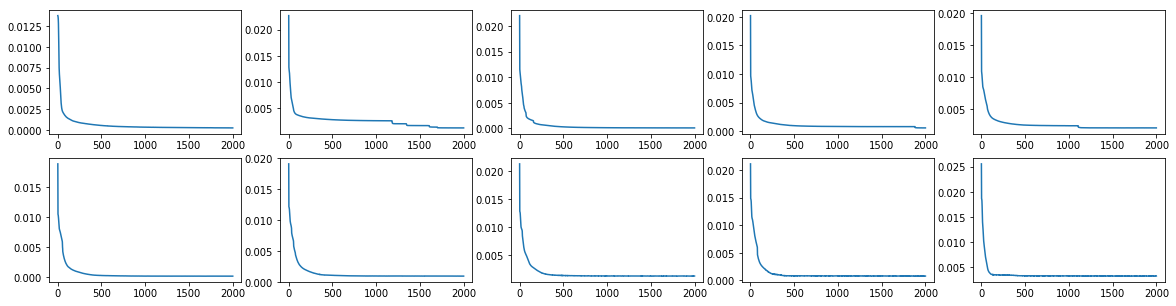

In [111]:
plt.clf()

tot = len(histories)
cols = 5
rows = tot//cols
rows += tot%cols

pos = range(1,tot+1)
print(tot)
fig = plt.figure(1, )
fig.set_figheight(5)
fig.set_figwidth(20)

for i,h in enumerate(histories):
    ax = fig.add_subplot(rows,cols,pos[i])
    loss = h.history['loss']
    epochs = range(1, len(loss)+1)
    ax.plot(epochs, loss)

plt.show()

In [112]:
history = autoencoder.fit(X,X, batch_size=512, epochs=2000)

Epoch 1/2000
20367/20367 [==============================] - 2s 95us/step - loss: 0.0031
Epoch 2/2000
20367/20367 [==============================] - 0s 11us/step - loss: 0.0020
Epoch 3/2000
20367/20367 [==============================] - 0s 12us/step - loss: 0.0017
Epoch 4/2000
20367/20367 [==============================] - 0s 12us/step - loss: 0.0016
Epoch 5/2000
20367/20367 [==============================] - 0s 12us/step - loss: 0.0015
Epoch 6/2000
20367/20367 [==============================] - 0s 12us/step - loss: 0.0014
Epoch 7/2000
20367/20367 [==============================] - 0s 12us/step - loss: 0.0013
Epoch 8/2000
20367/20367 [==============================] - 0s 12us/step - loss: 0.0013
Epoch 9/2000
20367/20367 [==============================] - 0s 12us/step - loss: 0.0013
Epoch 10/2000
20367/20367 [==============================] - 0s 12us/step - loss: 0.0012
Epoch 11/2000
20367/20367 [==============================] - 0s 12us/step - loss: 0.0012
Epoch 12/2000
20367/20367 [===

20367/20367 [==============================] - 0s 12us/step - loss: 6.5669e-04
Epoch 178/2000
20367/20367 [==============================] - 0s 12us/step - loss: 6.5620e-04
Epoch 179/2000
20367/20367 [==============================] - 0s 12us/step - loss: 6.5537e-04
Epoch 180/2000
20367/20367 [==============================] - 0s 12us/step - loss: 6.5482e-04
Epoch 181/2000
20367/20367 [==============================] - 0s 12us/step - loss: 6.5381e-04
Epoch 182/2000
20367/20367 [==============================] - 0s 12us/step - loss: 6.5312e-04
Epoch 183/2000
20367/20367 [==============================] - 0s 12us/step - loss: 6.5243e-04
Epoch 184/2000
20367/20367 [==============================] - 0s 12us/step - loss: 6.5176e-04
Epoch 185/2000
20367/20367 [==============================] - 0s 12us/step - loss: 6.5122e-04
Epoch 186/2000
20367/20367 [==============================] - 0s 12us/step - loss: 6.5037e-04
Epoch 187/2000
20367/20367 [==============================] - 0s 12us/step 

20367/20367 [==============================] - 0s 12us/step - loss: 5.5427e-04
Epoch 352/2000
20367/20367 [==============================] - 0s 12us/step - loss: 5.5400e-04
Epoch 353/2000
20367/20367 [==============================] - 0s 12us/step - loss: 5.5383e-04
Epoch 354/2000
20367/20367 [==============================] - 0s 12us/step - loss: 5.5302e-04
Epoch 355/2000
20367/20367 [==============================] - 0s 12us/step - loss: 5.5291e-04
Epoch 356/2000
20367/20367 [==============================] - 0s 12us/step - loss: 5.5238e-04
Epoch 357/2000
20367/20367 [==============================] - 0s 12us/step - loss: 5.5205e-04
Epoch 358/2000
20367/20367 [==============================] - 0s 12us/step - loss: 5.5190e-04
Epoch 359/2000
20367/20367 [==============================] - 0s 12us/step - loss: 5.5144e-04
Epoch 360/2000
20367/20367 [==============================] - 0s 13us/step - loss: 5.5104e-04
Epoch 361/2000
20367/20367 [==============================] - 0s 12us/step 

20367/20367 [==============================] - 0s 12us/step - loss: 5.0749e-04
Epoch 526/2000
20367/20367 [==============================] - 0s 12us/step - loss: 5.0772e-04
Epoch 527/2000
20367/20367 [==============================] - 0s 12us/step - loss: 5.0709e-04
Epoch 528/2000
20367/20367 [==============================] - 0s 12us/step - loss: 5.0715e-04
Epoch 529/2000
20367/20367 [==============================] - 0s 12us/step - loss: 5.0684e-04
Epoch 530/2000
20367/20367 [==============================] - 0s 12us/step - loss: 5.0654e-04
Epoch 531/2000
20367/20367 [==============================] - 0s 12us/step - loss: 5.0647e-04
Epoch 532/2000
20367/20367 [==============================] - 0s 12us/step - loss: 5.0635e-04
Epoch 533/2000
20367/20367 [==============================] - 0s 11us/step - loss: 5.0586e-04
Epoch 534/2000
20367/20367 [==============================] - 0s 12us/step - loss: 5.0572e-04
Epoch 535/2000
20367/20367 [==============================] - 0s 12us/step 

20367/20367 [==============================] - 0s 12us/step - loss: 4.8189e-04
Epoch 700/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.8148e-04
Epoch 701/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.8154e-04
Epoch 702/2000
20367/20367 [==============================] - 0s 11us/step - loss: 4.8126e-04
Epoch 703/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.8119e-04
Epoch 704/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.8106e-04
Epoch 705/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.8114e-04
Epoch 706/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.8113e-04
Epoch 707/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.8073e-04
Epoch 708/2000
20367/20367 [==============================] - 0s 11us/step - loss: 4.8072e-04
Epoch 709/2000
20367/20367 [==============================] - 0s 12us/step 

20367/20367 [==============================] - 0s 11us/step - loss: 4.6713e-04
Epoch 874/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.6657e-04
Epoch 875/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.6693e-04
Epoch 876/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.6668e-04
Epoch 877/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.6669e-04
Epoch 878/2000
20367/20367 [==============================] - 0s 11us/step - loss: 4.6654e-04
Epoch 879/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.6677e-04
Epoch 880/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.6642e-04
Epoch 881/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.6633e-04
Epoch 882/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.6644e-04
Epoch 883/2000
20367/20367 [==============================] - 0s 12us/step 

20367/20367 [==============================] - 0s 11us/step - loss: 4.5596e-04
Epoch 1047/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.5588e-04
Epoch 1048/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.5583e-04
Epoch 1049/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.5604e-04
Epoch 1050/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.5585e-04
Epoch 1051/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.5589e-04
Epoch 1052/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.5628e-04
Epoch 1053/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.5594e-04
Epoch 1054/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.5552e-04
Epoch 1055/2000
20367/20367 [==============================] - 0s 11us/step - loss: 4.5540e-04
Epoch 1056/2000
20367/20367 [==============================] - 0s 

20367/20367 [==============================] - 0s 12us/step - loss: 4.4654e-04
Epoch 1219/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.4630e-04
Epoch 1220/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.4627e-04
Epoch 1221/2000
20367/20367 [==============================] - 0s 11us/step - loss: 4.4605e-04
Epoch 1222/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.4621e-04
Epoch 1223/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.4610e-04
Epoch 1224/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.4592e-04
Epoch 1225/2000
20367/20367 [==============================] - 0s 11us/step - loss: 4.4586e-04
Epoch 1226/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.4610e-04
Epoch 1227/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.4596e-04
Epoch 1228/2000
20367/20367 [==============================] - 0s 

20367/20367 [==============================] - 0s 12us/step - loss: 4.2794e-04
Epoch 1391/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.2799e-04
Epoch 1392/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.2771e-04
Epoch 1393/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.2753e-04
Epoch 1394/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.2761e-04
Epoch 1395/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.2739e-04
Epoch 1396/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.2763e-04
Epoch 1397/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.2704e-04
Epoch 1398/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.2693e-04
Epoch 1399/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.2689e-04
Epoch 1400/2000
20367/20367 [==============================] - 0s 

20367/20367 [==============================] - 0s 12us/step - loss: 4.0797e-04
Epoch 1563/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.0800e-04
Epoch 1564/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.0801e-04
Epoch 1565/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.0786e-04
Epoch 1566/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.0775e-04
Epoch 1567/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.0780e-04
Epoch 1568/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.0783e-04
Epoch 1569/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.0792e-04
Epoch 1570/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.0757e-04
Epoch 1571/2000
20367/20367 [==============================] - 0s 12us/step - loss: 4.0755e-04
Epoch 1572/2000
20367/20367 [==============================] - 0s 

20367/20367 [==============================] - 0s 12us/step - loss: 3.9919e-04
Epoch 1735/2000
20367/20367 [==============================] - 0s 12us/step - loss: 3.9905e-04
Epoch 1736/2000
20367/20367 [==============================] - 0s 12us/step - loss: 3.9922e-04
Epoch 1737/2000
20367/20367 [==============================] - 0s 12us/step - loss: 3.9895e-04
Epoch 1738/2000
20367/20367 [==============================] - 0s 12us/step - loss: 3.9918e-04
Epoch 1739/2000
20367/20367 [==============================] - 0s 12us/step - loss: 3.9869e-04
Epoch 1740/2000
20367/20367 [==============================] - 0s 12us/step - loss: 3.9884e-04
Epoch 1741/2000
20367/20367 [==============================] - 0s 12us/step - loss: 3.9887e-04
Epoch 1742/2000
20367/20367 [==============================] - 0s 12us/step - loss: 3.9890e-04
Epoch 1743/2000
20367/20367 [==============================] - 0s 12us/step - loss: 3.9859e-04
Epoch 1744/2000
20367/20367 [==============================] - 0s 

20367/20367 [==============================] - 0s 11us/step - loss: 3.9272e-04
Epoch 1907/2000
20367/20367 [==============================] - 0s 12us/step - loss: 3.9241e-04
Epoch 1908/2000
20367/20367 [==============================] - 0s 11us/step - loss: 3.9268e-04
Epoch 1909/2000
20367/20367 [==============================] - 0s 12us/step - loss: 3.9240e-04
Epoch 1910/2000
20367/20367 [==============================] - 0s 12us/step - loss: 3.9230e-04
Epoch 1911/2000
20367/20367 [==============================] - 0s 12us/step - loss: 3.9241e-04
Epoch 1912/2000
20367/20367 [==============================] - 0s 12us/step - loss: 3.9211e-04
Epoch 1913/2000
20367/20367 [==============================] - 0s 12us/step - loss: 3.9246e-04
Epoch 1914/2000
20367/20367 [==============================] - 0s 12us/step - loss: 3.9254e-04
Epoch 1915/2000
20367/20367 [==============================] - 0s 12us/step - loss: 3.9188e-04
Epoch 1916/2000
20367/20367 [==============================] - 0s 

In [113]:
autoencoder.save_weights('autoencoder.h5')

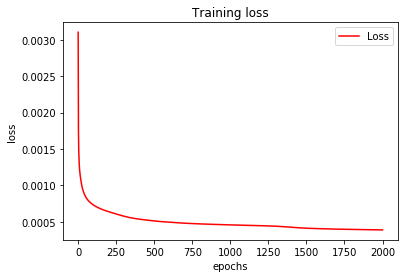

In [114]:
plt.clf()
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r', label='Loss')
plt.title('Training loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend()
plt.show()

In [11]:
# this looks nice   so what we ought to do is to drop the decoder into the front of our basic neural net 
# and see what kinda improvements we get?

In [18]:
for i,layer in enumerate(encoder.layers):
    layer.set_weights(autoencoder.layers[i].get_weights())

In [29]:
k_data = kepler_data.drop(['tce_rogue_flag', 'tce_delivname', 'rowupdate', 
                           'tce_datalink_dvs', 'tce_datalink_dvr', 'tce_steff_prov', 
                           'tce_slogg_prov', 'tce_smet_prov','tce_sradius_prov', 'tce_limbdark_mod',
                           'tce_trans_mod', 'tce_eccen', 'tce_eccen_err', 'tce_longp', 'tce_longp_err'
                          ],axis=1)
# drop some columns that we will not be using
# starting with all NA columns
k_data.dropna(axis=1,how='any', inplace=True)

# drop the Autovetter stuff
autovetter_cols = ['av_vf_pc', 'av_vf_pc_err', 'av_vf_afp',
                   'av_vf_afp_err', 'av_vf_ntp', 'av_vf_ntp_err', 
                   'av_pp_pc','av_pp_afp', 'av_pp_ntp', 
                   'av_training_set', 'av_pred_class']
# drop all autovetter columns execpt the training set - as those are manually set - take as "truth"

k_data = k_data.drop(['av_vf_pc', 'av_vf_pc_err', 'av_vf_afp','av_vf_afp_err',
                           'av_vf_ntp', 'av_vf_ntp_err', 'av_pp_pc','av_pp_afp', 
                           'av_pp_ntp', 'av_pred_class'],axis=1)

col_names = k_data.columns.values

k_data = pd.get_dummies(k_data, columns=['av_training_set'])


# train and test split
y = k_data[['av_training_set_AFP','av_training_set_NTP','av_training_set_PC', 'av_training_set_UNK']]

# update to be categorical
x = k_data
x = k_data.drop(['av_training_set_AFP','av_training_set_NTP','av_training_set_PC', 'av_training_set_UNK'], axis=1)
#x = k_data.drop(['rowid','kepid'], axis=1)
#x = k_data[['tce_mesmad','tce_maxmes', 'tce_minmes', 'tce_maxmesd', 'tce_minmesd', 'tce_plnt_num']]
x = (x - x.mean()) / (x.max() - x.min())

train_test_split_size = 5000
x_test = x[:train_test_split_size]
y_test = y[:train_test_split_size]

x_train = x[train_test_split_size:]
y_train = y[train_test_split_size:]

train_val_split_size = 1000

x_val = x_train[:train_val_split_size]
y_val = y_train[:train_val_split_size]
x_train = x_train[train_val_split_size:]
y_train = y_train[train_val_split_size:]


In [30]:

from keras import models, layers, optimizers, regularizers

# be really dumb and just attempt to pass into a net
deep_classifier = models.Sequential()
deep_classifier.add(layers.Dense(10,kernel_initializer='random_normal',
                       kernel_regularizer=regularizers.l2(0.01),
                       activation='relu', 
                       input_shape=(10,)))
deep_classifier.add(layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
deep_classifier.add(layers.Dense(40, activation='relu', kernel_regularizer=regularizers.l2(0.01),))
deep_classifier.add(layers.Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.01),))
deep_classifier.add(layers.Dense(4, activation='softmax'))

model = Sequential([encoder,
                   deep_classifier])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_12 (Sequential)   (None, 10)                42850     
_________________________________________________________________
sequential_22 (Sequential)   (None, 4)                 4054      
Total params: 46,904
Trainable params: 46,904
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(x_train,
                    y_train.values,
                    epochs=2000,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 14367 samples, validate on 1000 samples
Epoch 1/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.8911 - acc: 0.6250 - val_loss: 0.9972 - val_acc: 0.5810
Epoch 2/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.8967 - acc: 0.6269 - val_loss: 0.9341 - val_acc: 0.6000
Epoch 3/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.8748 - acc: 0.6273 - val_loss: 0.9362 - val_acc: 0.6050
Epoch 4/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.8695 - acc: 0.6326 - val_loss: 0.9389 - val_acc: 0.6100
Epoch 5/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.8608 - acc: 0.6401 - val_loss: 0.9483 - val_acc: 0.6050
Epoch 6/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.8543 - acc: 0.6426 - val_loss: 0.9366 - val_acc: 0.6090
Epoch 7/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.8596 - acc: 0.6411 - val_loss: 0.9

14367/14367 [==============================] - 0s 14us/step - loss: 0.7060 - acc: 0.6951 - val_loss: 0.8800 - val_acc: 0.6110
Epoch 60/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.7211 - acc: 0.6845 - val_loss: 0.8323 - val_acc: 0.6420
Epoch 61/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.6967 - acc: 0.7012 - val_loss: 0.8584 - val_acc: 0.6330
Epoch 62/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.6961 - acc: 0.7000 - val_loss: 0.8552 - val_acc: 0.6240
Epoch 63/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.7010 - acc: 0.6965 - val_loss: 0.8397 - val_acc: 0.6250
Epoch 64/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.7053 - acc: 0.6942 - val_loss: 0.8462 - val_acc: 0.6270
Epoch 65/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6929 - acc: 0.6988 - val_loss: 0.8310 - val_acc: 0.6310
Epoch 66/2000
14367/14367 [=======

14367/14367 [==============================] - 0s 14us/step - loss: 0.6507 - acc: 0.7125 - val_loss: 0.8452 - val_acc: 0.6360
Epoch 118/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6483 - acc: 0.7143 - val_loss: 0.8308 - val_acc: 0.6450
Epoch 119/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6391 - acc: 0.7203 - val_loss: 0.8352 - val_acc: 0.6360
Epoch 120/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6378 - acc: 0.7210 - val_loss: 0.8786 - val_acc: 0.6380
Epoch 121/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6522 - acc: 0.7136 - val_loss: 0.8521 - val_acc: 0.6460
Epoch 122/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6589 - acc: 0.7155 - val_loss: 0.8368 - val_acc: 0.6310
Epoch 123/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6533 - acc: 0.7144 - val_loss: 0.8448 - val_acc: 0.6300
Epoch 124/2000
14367/14367 [

14367/14367 [==============================] - 0s 14us/step - loss: 0.6297 - acc: 0.7297 - val_loss: 0.8491 - val_acc: 0.6260
Epoch 176/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6134 - acc: 0.7402 - val_loss: 0.8563 - val_acc: 0.6420
Epoch 177/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6097 - acc: 0.7395 - val_loss: 0.8786 - val_acc: 0.6240
Epoch 178/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6102 - acc: 0.7381 - val_loss: 0.8655 - val_acc: 0.6590
Epoch 179/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6128 - acc: 0.7334 - val_loss: 0.8598 - val_acc: 0.6290
Epoch 180/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6247 - acc: 0.7302 - val_loss: 0.8482 - val_acc: 0.6450
Epoch 181/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6098 - acc: 0.7331 - val_loss: 0.8729 - val_acc: 0.6360
Epoch 182/2000
14367/14367 [

14367/14367 [==============================] - 0s 13us/step - loss: 0.5964 - acc: 0.7502 - val_loss: 0.8936 - val_acc: 0.6300
Epoch 234/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.6060 - acc: 0.7446 - val_loss: 0.9016 - val_acc: 0.6050
Epoch 235/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6038 - acc: 0.7480 - val_loss: 0.8842 - val_acc: 0.6410
Epoch 236/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6053 - acc: 0.7450 - val_loss: 0.8864 - val_acc: 0.6310
Epoch 237/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5997 - acc: 0.7474 - val_loss: 0.8887 - val_acc: 0.6220
Epoch 238/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6100 - acc: 0.7445 - val_loss: 0.8912 - val_acc: 0.6380
Epoch 239/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6048 - acc: 0.7489 - val_loss: 0.8909 - val_acc: 0.6520
Epoch 240/2000
14367/14367 [

14367/14367 [==============================] - 0s 15us/step - loss: 0.5702 - acc: 0.7686 - val_loss: 0.8992 - val_acc: 0.6170
Epoch 292/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5684 - acc: 0.7640 - val_loss: 0.9248 - val_acc: 0.5940
Epoch 293/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.5867 - acc: 0.7569 - val_loss: 0.9084 - val_acc: 0.6340
Epoch 294/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.5674 - acc: 0.7684 - val_loss: 0.9055 - val_acc: 0.6210
Epoch 295/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.5962 - acc: 0.7581 - val_loss: 0.9163 - val_acc: 0.6420
Epoch 296/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5899 - acc: 0.7537 - val_loss: 0.9342 - val_acc: 0.6000
Epoch 297/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.5711 - acc: 0.7696 - val_loss: 0.9131 - val_acc: 0.6230
Epoch 298/2000
14367/14367 [

14367/14367 [==============================] - 0s 14us/step - loss: 0.5539 - acc: 0.7684 - val_loss: 0.9849 - val_acc: 0.6070
Epoch 350/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5540 - acc: 0.7688 - val_loss: 0.9842 - val_acc: 0.6290
Epoch 351/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.5604 - acc: 0.7688 - val_loss: 0.9455 - val_acc: 0.6360
Epoch 352/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5627 - acc: 0.7684 - val_loss: 0.9088 - val_acc: 0.6340
Epoch 353/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.5405 - acc: 0.7784 - val_loss: 0.9680 - val_acc: 0.6110
Epoch 354/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5443 - acc: 0.7769 - val_loss: 0.9618 - val_acc: 0.6300
Epoch 355/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5795 - acc: 0.7632 - val_loss: 0.9434 - val_acc: 0.6190
Epoch 356/2000
14367/14367 [

14367/14367 [==============================] - 0s 14us/step - loss: 0.5568 - acc: 0.7773 - val_loss: 0.9970 - val_acc: 0.6300
Epoch 408/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5756 - acc: 0.7746 - val_loss: 0.9837 - val_acc: 0.6330
Epoch 409/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5511 - acc: 0.7844 - val_loss: 1.0068 - val_acc: 0.6190
Epoch 410/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.5483 - acc: 0.7772 - val_loss: 0.9801 - val_acc: 0.6290
Epoch 411/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5519 - acc: 0.7710 - val_loss: 1.0554 - val_acc: 0.6180
Epoch 412/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.6278 - acc: 0.7628 - val_loss: 0.9765 - val_acc: 0.6340
Epoch 413/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6249 - acc: 0.7419 - val_loss: 0.9893 - val_acc: 0.6200
Epoch 414/2000
14367/14367 [

14367/14367 [==============================] - 0s 14us/step - loss: 0.6237 - acc: 0.7465 - val_loss: 1.0037 - val_acc: 0.6170
Epoch 466/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6032 - acc: 0.7556 - val_loss: 0.9634 - val_acc: 0.6320
Epoch 467/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6132 - acc: 0.7515 - val_loss: 1.0331 - val_acc: 0.5690
Epoch 468/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6042 - acc: 0.7530 - val_loss: 0.9836 - val_acc: 0.6130
Epoch 469/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.5879 - acc: 0.7643 - val_loss: 1.0045 - val_acc: 0.5970
Epoch 470/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.5750 - acc: 0.7711 - val_loss: 1.0181 - val_acc: 0.6150
Epoch 471/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.6888 - acc: 0.7103 - val_loss: 1.0066 - val_acc: 0.5940
Epoch 472/2000
14367/14367 [

14367/14367 [==============================] - 0s 15us/step - loss: 0.6134 - acc: 0.7604 - val_loss: 0.9837 - val_acc: 0.6390
Epoch 524/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6224 - acc: 0.7546 - val_loss: 1.0251 - val_acc: 0.6290
Epoch 525/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6299 - acc: 0.7532 - val_loss: 0.9795 - val_acc: 0.6420
Epoch 526/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6042 - acc: 0.7658 - val_loss: 0.9744 - val_acc: 0.6340
Epoch 527/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.5829 - acc: 0.7741 - val_loss: 1.0168 - val_acc: 0.6370
Epoch 528/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5988 - acc: 0.7619 - val_loss: 0.9753 - val_acc: 0.6380
Epoch 529/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.5778 - acc: 0.7693 - val_loss: 1.0032 - val_acc: 0.6280
Epoch 530/2000
14367/14367 [

14367/14367 [==============================] - 0s 14us/step - loss: 0.7058 - acc: 0.6972 - val_loss: 0.9899 - val_acc: 0.6060
Epoch 582/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.6646 - acc: 0.7209 - val_loss: 0.9758 - val_acc: 0.5870
Epoch 583/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6271 - acc: 0.7398 - val_loss: 0.9707 - val_acc: 0.5930
Epoch 584/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6081 - acc: 0.7516 - val_loss: 0.9736 - val_acc: 0.6530
Epoch 585/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5991 - acc: 0.7552 - val_loss: 0.9994 - val_acc: 0.6260
Epoch 586/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5989 - acc: 0.7571 - val_loss: 0.9638 - val_acc: 0.6450
Epoch 587/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5747 - acc: 0.7694 - val_loss: 0.9715 - val_acc: 0.6500
Epoch 588/2000
14367/14367 [

14367/14367 [==============================] - 0s 14us/step - loss: 0.6321 - acc: 0.7393 - val_loss: 0.9094 - val_acc: 0.6470
Epoch 640/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6156 - acc: 0.7459 - val_loss: 0.9074 - val_acc: 0.6470
Epoch 641/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6030 - acc: 0.7506 - val_loss: 0.8909 - val_acc: 0.6620
Epoch 642/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6008 - acc: 0.7497 - val_loss: 0.9189 - val_acc: 0.6520
Epoch 643/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5899 - acc: 0.7572 - val_loss: 0.9317 - val_acc: 0.6350
Epoch 644/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5855 - acc: 0.7590 - val_loss: 0.9774 - val_acc: 0.6490
Epoch 645/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5823 - acc: 0.7594 - val_loss: 0.9223 - val_acc: 0.6590
Epoch 646/2000
14367/14367 [

14367/14367 [==============================] - 0s 13us/step - loss: 0.5785 - acc: 0.7698 - val_loss: 0.9558 - val_acc: 0.6210
Epoch 698/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5627 - acc: 0.7752 - val_loss: 0.9442 - val_acc: 0.6310
Epoch 699/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5758 - acc: 0.7778 - val_loss: 0.9502 - val_acc: 0.6400
Epoch 700/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.5902 - acc: 0.7670 - val_loss: 1.0242 - val_acc: 0.6370
Epoch 701/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.5945 - acc: 0.7576 - val_loss: 0.9834 - val_acc: 0.6290
Epoch 702/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5653 - acc: 0.7709 - val_loss: 0.9631 - val_acc: 0.6310
Epoch 703/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5771 - acc: 0.7665 - val_loss: 0.9409 - val_acc: 0.6480
Epoch 704/2000
14367/14367 [

14367/14367 [==============================] - 0s 14us/step - loss: 0.6332 - acc: 0.7447 - val_loss: 0.9026 - val_acc: 0.6530
Epoch 756/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6346 - acc: 0.7361 - val_loss: 0.8486 - val_acc: 0.6430
Epoch 757/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6309 - acc: 0.7376 - val_loss: 0.8805 - val_acc: 0.6440
Epoch 758/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6293 - acc: 0.7419 - val_loss: 0.8716 - val_acc: 0.6410
Epoch 759/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6263 - acc: 0.7418 - val_loss: 0.8527 - val_acc: 0.6380
Epoch 760/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6546 - acc: 0.7252 - val_loss: 0.8708 - val_acc: 0.6280
Epoch 761/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6635 - acc: 0.7200 - val_loss: 0.8435 - val_acc: 0.6270
Epoch 762/2000
14367/14367 [

14367/14367 [==============================] - 0s 14us/step - loss: 0.5879 - acc: 0.7612 - val_loss: 0.8561 - val_acc: 0.6460
Epoch 814/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5802 - acc: 0.7647 - val_loss: 0.8949 - val_acc: 0.6370
Epoch 815/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5842 - acc: 0.7647 - val_loss: 0.9015 - val_acc: 0.6440
Epoch 816/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5880 - acc: 0.7624 - val_loss: 0.9152 - val_acc: 0.6280
Epoch 817/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6007 - acc: 0.7554 - val_loss: 0.9371 - val_acc: 0.6370
Epoch 818/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6503 - acc: 0.7386 - val_loss: 0.9231 - val_acc: 0.6370
Epoch 819/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6015 - acc: 0.7570 - val_loss: 0.9205 - val_acc: 0.6370
Epoch 820/2000
14367/14367 [

14367/14367 [==============================] - 0s 14us/step - loss: 0.7277 - acc: 0.6896 - val_loss: 0.9414 - val_acc: 0.5930
Epoch 872/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.7138 - acc: 0.6978 - val_loss: 0.8991 - val_acc: 0.6200
Epoch 873/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6918 - acc: 0.7064 - val_loss: 0.8893 - val_acc: 0.6100
Epoch 874/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6806 - acc: 0.7139 - val_loss: 0.9341 - val_acc: 0.6050
Epoch 875/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6817 - acc: 0.7166 - val_loss: 0.9041 - val_acc: 0.6050
Epoch 876/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6715 - acc: 0.7206 - val_loss: 0.8839 - val_acc: 0.6150
Epoch 877/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6611 - acc: 0.7275 - val_loss: 0.9222 - val_acc: 0.5960
Epoch 878/2000
14367/14367 [

14367/14367 [==============================] - 0s 14us/step - loss: 0.5388 - acc: 0.7917 - val_loss: 0.9540 - val_acc: 0.6250
Epoch 930/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.5384 - acc: 0.7935 - val_loss: 0.9442 - val_acc: 0.6440
Epoch 931/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.5281 - acc: 0.7970 - val_loss: 0.9710 - val_acc: 0.6220
Epoch 932/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5315 - acc: 0.7954 - val_loss: 0.9676 - val_acc: 0.6310
Epoch 933/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5319 - acc: 0.7949 - val_loss: 0.9850 - val_acc: 0.6200
Epoch 934/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5413 - acc: 0.7928 - val_loss: 0.9413 - val_acc: 0.6420
Epoch 935/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.5295 - acc: 0.7988 - val_loss: 0.9833 - val_acc: 0.6290
Epoch 936/2000
14367/14367 [

14367/14367 [==============================] - 0s 14us/step - loss: 0.4733 - acc: 0.8284 - val_loss: 1.0477 - val_acc: 0.6360
Epoch 988/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4728 - acc: 0.8304 - val_loss: 1.0603 - val_acc: 0.6230
Epoch 989/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4930 - acc: 0.8225 - val_loss: 1.0425 - val_acc: 0.6400
Epoch 990/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4880 - acc: 0.8223 - val_loss: 1.0290 - val_acc: 0.6320
Epoch 991/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.4778 - acc: 0.8273 - val_loss: 1.0623 - val_acc: 0.6340
Epoch 992/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4649 - acc: 0.8320 - val_loss: 1.0686 - val_acc: 0.6350
Epoch 993/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.4633 - acc: 0.8292 - val_loss: 1.0593 - val_acc: 0.6370
Epoch 994/2000
14367/14367 [

Epoch 1045/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4189 - acc: 0.8538 - val_loss: 1.1727 - val_acc: 0.6310
Epoch 1046/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4334 - acc: 0.8487 - val_loss: 1.1727 - val_acc: 0.6350
Epoch 1047/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.4263 - acc: 0.8495 - val_loss: 1.1873 - val_acc: 0.6420
Epoch 1048/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4525 - acc: 0.8394 - val_loss: 1.1463 - val_acc: 0.6340
Epoch 1049/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4467 - acc: 0.8394 - val_loss: 1.1183 - val_acc: 0.6270
Epoch 1050/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4178 - acc: 0.8525 - val_loss: 1.1841 - val_acc: 0.6290
Epoch 1051/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4128 - acc: 0.8567 - val_loss: 1.1819 - val_acc: 0.6340
Epoch 

14367/14367 [==============================] - 0s 15us/step - loss: 0.7389 - acc: 0.6830 - val_loss: 0.9084 - val_acc: 0.6040
Epoch 1103/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.7236 - acc: 0.6910 - val_loss: 0.8962 - val_acc: 0.6130
Epoch 1104/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.7285 - acc: 0.6896 - val_loss: 0.8775 - val_acc: 0.6070
Epoch 1105/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.7212 - acc: 0.6969 - val_loss: 0.9054 - val_acc: 0.6180
Epoch 1106/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.7203 - acc: 0.6960 - val_loss: 0.8858 - val_acc: 0.6210
Epoch 1107/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.7107 - acc: 0.7031 - val_loss: 0.8922 - val_acc: 0.6300
Epoch 1108/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.7067 - acc: 0.7056 - val_loss: 0.9103 - val_acc: 0.6110
Epoch 1109/2000
14367/

Epoch 1160/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.6729 - acc: 0.7324 - val_loss: 0.8781 - val_acc: 0.6250
Epoch 1161/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.6673 - acc: 0.7345 - val_loss: 0.8932 - val_acc: 0.6190
Epoch 1162/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.6936 - acc: 0.7270 - val_loss: 0.9213 - val_acc: 0.6060
Epoch 1163/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.7033 - acc: 0.7233 - val_loss: 0.9022 - val_acc: 0.6230
Epoch 1164/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6871 - acc: 0.7330 - val_loss: 0.9062 - val_acc: 0.6070
Epoch 1165/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.6588 - acc: 0.7370 - val_loss: 0.9084 - val_acc: 0.6210
Epoch 1166/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6644 - acc: 0.7324 - val_loss: 0.8942 - val_acc: 0.6040
Epoch 

14367/14367 [==============================] - 0s 14us/step - loss: 0.6599 - acc: 0.7484 - val_loss: 0.9589 - val_acc: 0.5830
Epoch 1218/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.6792 - acc: 0.7364 - val_loss: 0.9440 - val_acc: 0.6280
Epoch 1219/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.6539 - acc: 0.7513 - val_loss: 0.9404 - val_acc: 0.6010
Epoch 1220/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.6506 - acc: 0.7505 - val_loss: 0.9320 - val_acc: 0.6080
Epoch 1221/2000
14367/14367 [==============================] - 0s 16us/step - loss: 0.6489 - acc: 0.7562 - val_loss: 0.9651 - val_acc: 0.6150
Epoch 1222/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6762 - acc: 0.7414 - val_loss: 0.9307 - val_acc: 0.6190
Epoch 1223/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6592 - acc: 0.7505 - val_loss: 0.9425 - val_acc: 0.6150
Epoch 1224/2000
14367/

Epoch 1275/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.5918 - acc: 0.7734 - val_loss: 1.0247 - val_acc: 0.6100
Epoch 1276/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5999 - acc: 0.7666 - val_loss: 1.0006 - val_acc: 0.6100
Epoch 1277/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5843 - acc: 0.7756 - val_loss: 1.1486 - val_acc: 0.5450
Epoch 1278/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.6397 - acc: 0.7505 - val_loss: 0.9885 - val_acc: 0.6180
Epoch 1279/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5901 - acc: 0.7729 - val_loss: 1.0217 - val_acc: 0.6170
Epoch 1280/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5764 - acc: 0.7793 - val_loss: 1.0091 - val_acc: 0.6340
Epoch 1281/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5788 - acc: 0.7778 - val_loss: 1.0551 - val_acc: 0.6050
Epoch 

14367/14367 [==============================] - 0s 14us/step - loss: 0.5330 - acc: 0.8041 - val_loss: 1.1521 - val_acc: 0.6130
Epoch 1333/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5042 - acc: 0.8136 - val_loss: 1.1905 - val_acc: 0.6080
Epoch 1334/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.5111 - acc: 0.8088 - val_loss: 1.1873 - val_acc: 0.5840
Epoch 1335/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5003 - acc: 0.8149 - val_loss: 1.1921 - val_acc: 0.5920
Epoch 1336/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4868 - acc: 0.8210 - val_loss: 1.1714 - val_acc: 0.6100
Epoch 1337/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4949 - acc: 0.8174 - val_loss: 1.2388 - val_acc: 0.5900
Epoch 1338/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4828 - acc: 0.8247 - val_loss: 1.2095 - val_acc: 0.6100
Epoch 1339/2000
14367/

Epoch 1390/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4187 - acc: 0.8573 - val_loss: 1.2922 - val_acc: 0.6050
Epoch 1391/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4260 - acc: 0.8523 - val_loss: 1.3560 - val_acc: 0.6040
Epoch 1392/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4206 - acc: 0.8560 - val_loss: 1.3324 - val_acc: 0.5960
Epoch 1393/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4599 - acc: 0.8378 - val_loss: 1.2706 - val_acc: 0.6150
Epoch 1394/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.4307 - acc: 0.8480 - val_loss: 1.2736 - val_acc: 0.6170
Epoch 1395/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4531 - acc: 0.8397 - val_loss: 1.2420 - val_acc: 0.6050
Epoch 1396/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4331 - acc: 0.8490 - val_loss: 1.2990 - val_acc: 0.6110
Epoch 

14367/14367 [==============================] - 0s 14us/step - loss: 0.3759 - acc: 0.8724 - val_loss: 1.4970 - val_acc: 0.6000
Epoch 1448/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3857 - acc: 0.8691 - val_loss: 1.4121 - val_acc: 0.6070
Epoch 1449/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.3693 - acc: 0.8780 - val_loss: 1.4974 - val_acc: 0.6070
Epoch 1450/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.3614 - acc: 0.8782 - val_loss: 1.4529 - val_acc: 0.6100
Epoch 1451/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.3700 - acc: 0.8740 - val_loss: 1.4050 - val_acc: 0.6150
Epoch 1452/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3588 - acc: 0.8781 - val_loss: 1.4705 - val_acc: 0.6050
Epoch 1453/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3886 - acc: 0.8653 - val_loss: 1.4529 - val_acc: 0.6020
Epoch 1454/2000
14367/

Epoch 1505/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3203 - acc: 0.8951 - val_loss: 1.6796 - val_acc: 0.6000
Epoch 1506/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3478 - acc: 0.8831 - val_loss: 1.5517 - val_acc: 0.6140
Epoch 1507/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3403 - acc: 0.8868 - val_loss: 1.6647 - val_acc: 0.5820
Epoch 1508/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3543 - acc: 0.8780 - val_loss: 1.5905 - val_acc: 0.5960
Epoch 1509/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3766 - acc: 0.8697 - val_loss: 1.5588 - val_acc: 0.6100
Epoch 1510/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3504 - acc: 0.8815 - val_loss: 1.5924 - val_acc: 0.6050
Epoch 1511/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3098 - acc: 0.8953 - val_loss: 1.6866 - val_acc: 0.5970
Epoch 

14367/14367 [==============================] - 0s 14us/step - loss: 0.2825 - acc: 0.9085 - val_loss: 1.7406 - val_acc: 0.5970
Epoch 1563/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2805 - acc: 0.9071 - val_loss: 1.7551 - val_acc: 0.5880
Epoch 1564/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2899 - acc: 0.9012 - val_loss: 1.7472 - val_acc: 0.5920
Epoch 1565/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2840 - acc: 0.9040 - val_loss: 1.8071 - val_acc: 0.5780
Epoch 1566/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2881 - acc: 0.9036 - val_loss: 1.7610 - val_acc: 0.6020
Epoch 1567/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2780 - acc: 0.9071 - val_loss: 1.8423 - val_acc: 0.5890
Epoch 1568/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2877 - acc: 0.9025 - val_loss: 1.7664 - val_acc: 0.5940
Epoch 1569/2000
14367/

Epoch 1620/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3155 - acc: 0.8930 - val_loss: 1.7845 - val_acc: 0.6020
Epoch 1621/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2739 - acc: 0.9069 - val_loss: 1.7948 - val_acc: 0.5880
Epoch 1622/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2537 - acc: 0.9154 - val_loss: 1.8218 - val_acc: 0.6050
Epoch 1623/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2810 - acc: 0.9067 - val_loss: 1.7909 - val_acc: 0.5950
Epoch 1624/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2497 - acc: 0.9168 - val_loss: 1.8503 - val_acc: 0.5880
Epoch 1625/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2727 - acc: 0.9087 - val_loss: 1.8157 - val_acc: 0.5930
Epoch 1626/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2887 - acc: 0.9019 - val_loss: 1.8930 - val_acc: 0.5810
Epoch 

14367/14367 [==============================] - 0s 14us/step - loss: 0.2070 - acc: 0.9294 - val_loss: 2.1148 - val_acc: 0.5890
Epoch 1678/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.2214 - acc: 0.9249 - val_loss: 2.0562 - val_acc: 0.5820
Epoch 1679/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2269 - acc: 0.9216 - val_loss: 2.0264 - val_acc: 0.5870
Epoch 1680/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3045 - acc: 0.8973 - val_loss: 1.9609 - val_acc: 0.5910
Epoch 1681/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2866 - acc: 0.9050 - val_loss: 1.9482 - val_acc: 0.5790
Epoch 1682/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2423 - acc: 0.9183 - val_loss: 1.9683 - val_acc: 0.5840
Epoch 1683/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.2113 - acc: 0.9291 - val_loss: 2.0197 - val_acc: 0.5800
Epoch 1684/2000
14367/

Epoch 1735/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2395 - acc: 0.9177 - val_loss: 2.1197 - val_acc: 0.5780
Epoch 1736/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.2279 - acc: 0.9197 - val_loss: 2.1708 - val_acc: 0.5710
Epoch 1737/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2115 - acc: 0.9271 - val_loss: 2.1169 - val_acc: 0.5740
Epoch 1738/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2054 - acc: 0.9289 - val_loss: 2.1664 - val_acc: 0.5860
Epoch 1739/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.2094 - acc: 0.9271 - val_loss: 2.1611 - val_acc: 0.5790
Epoch 1740/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2382 - acc: 0.9170 - val_loss: 2.0487 - val_acc: 0.5870
Epoch 1741/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2454 - acc: 0.9168 - val_loss: 2.0704 - val_acc: 0.5830
Epoch 

14367/14367 [==============================] - 0s 14us/step - loss: 0.1682 - acc: 0.9411 - val_loss: 2.4024 - val_acc: 0.5680
Epoch 1793/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.1878 - acc: 0.9314 - val_loss: 2.2471 - val_acc: 0.5770
Epoch 1794/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3647 - acc: 0.8834 - val_loss: 1.9563 - val_acc: 0.5810
Epoch 1795/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2359 - acc: 0.9200 - val_loss: 2.1008 - val_acc: 0.5680
Epoch 1796/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1871 - acc: 0.9355 - val_loss: 2.1379 - val_acc: 0.5770
Epoch 1797/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1705 - acc: 0.9401 - val_loss: 2.3059 - val_acc: 0.5800
Epoch 1798/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2510 - acc: 0.9119 - val_loss: 2.0983 - val_acc: 0.5800
Epoch 1799/2000
14367/

Epoch 1850/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1787 - acc: 0.9332 - val_loss: 2.3404 - val_acc: 0.5740
Epoch 1851/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.1510 - acc: 0.9464 - val_loss: 2.4987 - val_acc: 0.5710
Epoch 1852/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.1442 - acc: 0.9497 - val_loss: 2.4459 - val_acc: 0.5700
Epoch 1853/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1866 - acc: 0.9337 - val_loss: 2.4000 - val_acc: 0.5810
Epoch 1854/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1812 - acc: 0.9342 - val_loss: 2.3738 - val_acc: 0.5720
Epoch 1855/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1884 - acc: 0.9312 - val_loss: 2.3143 - val_acc: 0.5750
Epoch 1856/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1631 - acc: 0.9445 - val_loss: 2.4125 - val_acc: 0.5800
Epoch 

14367/14367 [==============================] - 0s 14us/step - loss: 0.1470 - acc: 0.9482 - val_loss: 2.3099 - val_acc: 0.5740
Epoch 1908/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1453 - acc: 0.9508 - val_loss: 2.4061 - val_acc: 0.5790
Epoch 1909/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1444 - acc: 0.9513 - val_loss: 2.4042 - val_acc: 0.5750
Epoch 1910/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1489 - acc: 0.9491 - val_loss: 2.5769 - val_acc: 0.5700
Epoch 1911/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1486 - acc: 0.9486 - val_loss: 2.4160 - val_acc: 0.5580
Epoch 1912/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1507 - acc: 0.9486 - val_loss: 2.3774 - val_acc: 0.5690
Epoch 1913/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1607 - acc: 0.9445 - val_loss: 2.4570 - val_acc: 0.5800
Epoch 1914/2000
14367/

Epoch 1965/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1444 - acc: 0.9474 - val_loss: 2.4416 - val_acc: 0.5860
Epoch 1966/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1300 - acc: 0.9552 - val_loss: 2.4166 - val_acc: 0.5830
Epoch 1967/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1665 - acc: 0.9409 - val_loss: 2.4647 - val_acc: 0.5730
Epoch 1968/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1421 - acc: 0.9512 - val_loss: 2.4714 - val_acc: 0.5760
Epoch 1969/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1378 - acc: 0.9516 - val_loss: 2.4419 - val_acc: 0.5750
Epoch 1970/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1506 - acc: 0.9454 - val_loss: 2.3949 - val_acc: 0.5730
Epoch 1971/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1774 - acc: 0.9367 - val_loss: 2.3899 - val_acc: 0.5630
Epoch 

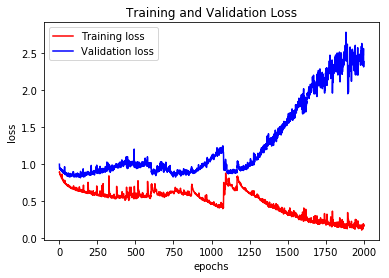

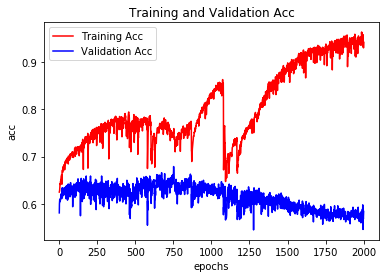

In [33]:

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend()
plt.show()


plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'r', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel('epochs')
plt.ylabel('acc')

plt.legend()
plt.show()

In [34]:
results = model.evaluate(x_test, y_test)
results


5000/5000 [==============================] - 0s 41us/step


[2.53539251909256, 0.5612]

In [35]:

# be really dumb and just attempt to pass into a net
deep_classifier = models.Sequential()
deep_classifier.add(layers.Dense(10,kernel_initializer='random_normal',
                       kernel_regularizer=regularizers.l2(0.01),
                       activation='relu', 
                       input_shape=(10,)))
deep_classifier.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
deep_classifier.add(layers.Dense(7, activation='relu', kernel_regularizer=regularizers.l2(0.01),))
deep_classifier.add(layers.Dense(4, activation='softmax'))

model = Sequential([encoder,
                   deep_classifier])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_12 (Sequential)   (None, 10)                42850     
_________________________________________________________________
sequential_24 (Sequential)   (None, 4)                 329       
Total params: 43,179
Trainable params: 43,179
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(x_train,
                    y_train.values,
                    epochs=2000,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 14367 samples, validate on 1000 samples
Epoch 1/2000
14367/14367 [==============================] - 1s 60us/step - loss: 14.1947 - acc: 0.1283 - val_loss: 13.9396 - val_acc: 0.1400
Epoch 2/2000
14367/14367 [==============================] - 0s 13us/step - loss: 6.1508 - acc: 0.1751 - val_loss: 1.5181 - val_acc: 0.2440
Epoch 3/2000
14367/14367 [==============================] - 0s 13us/step - loss: 1.4828 - acc: 0.3249 - val_loss: 1.4486 - val_acc: 0.4780
Epoch 4/2000
14367/14367 [==============================] - 0s 13us/step - loss: 1.3696 - acc: 0.5627 - val_loss: 1.2828 - val_acc: 0.5610
Epoch 5/2000
14367/14367 [==============================] - 0s 14us/step - loss: 1.1557 - acc: 0.6037 - val_loss: 1.1267 - val_acc: 0.5750
Epoch 6/2000
14367/14367 [==============================] - 0s 14us/step - loss: 1.0302 - acc: 0.6137 - val_loss: 1.0781 - val_acc: 0.5750
Epoch 7/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.9829 - acc: 0.6189 - val_loss: 1

14367/14367 [==============================] - 0s 13us/step - loss: 0.4890 - acc: 0.8551 - val_loss: 1.2528 - val_acc: 0.6000
Epoch 60/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5252 - acc: 0.8393 - val_loss: 1.1804 - val_acc: 0.6010
Epoch 61/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.5156 - acc: 0.8387 - val_loss: 1.2272 - val_acc: 0.6050
Epoch 62/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.5034 - acc: 0.8453 - val_loss: 1.2241 - val_acc: 0.6160
Epoch 63/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4755 - acc: 0.8560 - val_loss: 1.2604 - val_acc: 0.6150
Epoch 64/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.4695 - acc: 0.8610 - val_loss: 1.2490 - val_acc: 0.6150
Epoch 65/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.4927 - acc: 0.8473 - val_loss: 1.2285 - val_acc: 0.6010
Epoch 66/2000
14367/14367 [=======

14367/14367 [==============================] - 0s 14us/step - loss: 0.3968 - acc: 0.8785 - val_loss: 1.4674 - val_acc: 0.6010
Epoch 118/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3857 - acc: 0.8879 - val_loss: 1.5949 - val_acc: 0.6040
Epoch 119/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3854 - acc: 0.8859 - val_loss: 1.6588 - val_acc: 0.6010
Epoch 120/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.3781 - acc: 0.8899 - val_loss: 1.6009 - val_acc: 0.5920
Epoch 121/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4090 - acc: 0.8775 - val_loss: 1.4594 - val_acc: 0.5840
Epoch 122/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.4041 - acc: 0.8781 - val_loss: 1.5652 - val_acc: 0.5850
Epoch 123/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3673 - acc: 0.8943 - val_loss: 1.5053 - val_acc: 0.6060
Epoch 124/2000
14367/14367 [

14367/14367 [==============================] - 0s 13us/step - loss: 0.3821 - acc: 0.8832 - val_loss: 1.5291 - val_acc: 0.6170
Epoch 176/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3367 - acc: 0.9007 - val_loss: 1.5925 - val_acc: 0.6090
Epoch 177/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3271 - acc: 0.9031 - val_loss: 1.6773 - val_acc: 0.6030
Epoch 178/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3398 - acc: 0.8997 - val_loss: 1.5540 - val_acc: 0.6030
Epoch 179/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.3162 - acc: 0.9088 - val_loss: 1.6843 - val_acc: 0.6090
Epoch 180/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3285 - acc: 0.9070 - val_loss: 1.7506 - val_acc: 0.5890
Epoch 181/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.3269 - acc: 0.9052 - val_loss: 1.6834 - val_acc: 0.5790
Epoch 182/2000
14367/14367 [

14367/14367 [==============================] - 0s 13us/step - loss: 0.2297 - acc: 0.9332 - val_loss: 1.9149 - val_acc: 0.6110
Epoch 234/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.2454 - acc: 0.9275 - val_loss: 1.8939 - val_acc: 0.6050
Epoch 235/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2464 - acc: 0.9273 - val_loss: 1.9449 - val_acc: 0.6160
Epoch 236/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2890 - acc: 0.9106 - val_loss: 1.7705 - val_acc: 0.6050
Epoch 237/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2630 - acc: 0.9207 - val_loss: 1.8906 - val_acc: 0.6150
Epoch 238/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2600 - acc: 0.9218 - val_loss: 1.7899 - val_acc: 0.6130
Epoch 239/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.3029 - acc: 0.9081 - val_loss: 1.8428 - val_acc: 0.6060
Epoch 240/2000
14367/14367 [

14367/14367 [==============================] - 0s 13us/step - loss: 0.2363 - acc: 0.9278 - val_loss: 1.9562 - val_acc: 0.6170
Epoch 292/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2797 - acc: 0.9145 - val_loss: 1.9188 - val_acc: 0.6060
Epoch 293/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2678 - acc: 0.9170 - val_loss: 1.8469 - val_acc: 0.5970
Epoch 294/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.2431 - acc: 0.9239 - val_loss: 1.9062 - val_acc: 0.6040
Epoch 295/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.2152 - acc: 0.9324 - val_loss: 1.9824 - val_acc: 0.6080
Epoch 296/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2086 - acc: 0.9358 - val_loss: 1.9076 - val_acc: 0.6080
Epoch 297/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1891 - acc: 0.9423 - val_loss: 2.0187 - val_acc: 0.6010
Epoch 298/2000
14367/14367 [

14367/14367 [==============================] - 0s 13us/step - loss: 0.1721 - acc: 0.9459 - val_loss: 2.2573 - val_acc: 0.6000
Epoch 350/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1642 - acc: 0.9477 - val_loss: 2.1731 - val_acc: 0.5970
Epoch 351/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1756 - acc: 0.9441 - val_loss: 2.1880 - val_acc: 0.5860
Epoch 352/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1569 - acc: 0.9500 - val_loss: 2.1499 - val_acc: 0.5890
Epoch 353/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.3028 - acc: 0.9051 - val_loss: 1.9018 - val_acc: 0.6030
Epoch 354/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.3452 - acc: 0.8858 - val_loss: 1.7879 - val_acc: 0.5770
Epoch 355/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2835 - acc: 0.9067 - val_loss: 1.8680 - val_acc: 0.5970
Epoch 356/2000
14367/14367 [

14367/14367 [==============================] - 0s 13us/step - loss: 0.1751 - acc: 0.9425 - val_loss: 2.0658 - val_acc: 0.5890
Epoch 408/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1449 - acc: 0.9552 - val_loss: 2.1820 - val_acc: 0.5960
Epoch 409/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1578 - acc: 0.9498 - val_loss: 2.3283 - val_acc: 0.5930
Epoch 410/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1905 - acc: 0.9406 - val_loss: 2.1674 - val_acc: 0.5960
Epoch 411/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1554 - acc: 0.9493 - val_loss: 2.1452 - val_acc: 0.5980
Epoch 412/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1427 - acc: 0.9545 - val_loss: 2.2515 - val_acc: 0.5870
Epoch 413/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.2506 - acc: 0.9200 - val_loss: 1.9556 - val_acc: 0.6110
Epoch 414/2000
14367/14367 [

14367/14367 [==============================] - 0s 13us/step - loss: 0.1213 - acc: 0.9612 - val_loss: 2.4622 - val_acc: 0.5950
Epoch 466/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1243 - acc: 0.9628 - val_loss: 2.4010 - val_acc: 0.5990
Epoch 467/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1286 - acc: 0.9591 - val_loss: 2.4464 - val_acc: 0.5860
Epoch 468/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1106 - acc: 0.9666 - val_loss: 2.4614 - val_acc: 0.5960
Epoch 469/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1167 - acc: 0.9614 - val_loss: 2.5393 - val_acc: 0.6000
Epoch 470/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1163 - acc: 0.9658 - val_loss: 2.3935 - val_acc: 0.5960
Epoch 471/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1300 - acc: 0.9589 - val_loss: 2.4768 - val_acc: 0.5870
Epoch 472/2000
14367/14367 [

14367/14367 [==============================] - 0s 13us/step - loss: 0.1738 - acc: 0.9401 - val_loss: 2.2330 - val_acc: 0.5920
Epoch 524/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1513 - acc: 0.9515 - val_loss: 2.2483 - val_acc: 0.5920
Epoch 525/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.2344 - acc: 0.9236 - val_loss: 2.0637 - val_acc: 0.6050
Epoch 526/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1974 - acc: 0.9346 - val_loss: 2.1246 - val_acc: 0.5880
Epoch 527/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.2059 - acc: 0.9314 - val_loss: 2.0110 - val_acc: 0.5860
Epoch 528/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1649 - acc: 0.9455 - val_loss: 2.1810 - val_acc: 0.5930
Epoch 529/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1833 - acc: 0.9385 - val_loss: 2.2730 - val_acc: 0.5830
Epoch 530/2000
14367/14367 [

14367/14367 [==============================] - 0s 13us/step - loss: 0.1175 - acc: 0.9644 - val_loss: 2.4461 - val_acc: 0.5890
Epoch 582/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1199 - acc: 0.9619 - val_loss: 2.4434 - val_acc: 0.6010
Epoch 583/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1062 - acc: 0.9678 - val_loss: 2.4693 - val_acc: 0.5960
Epoch 584/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1402 - acc: 0.9572 - val_loss: 2.4140 - val_acc: 0.6000
Epoch 585/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1285 - acc: 0.9602 - val_loss: 2.4774 - val_acc: 0.5860
Epoch 586/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1176 - acc: 0.9643 - val_loss: 2.5511 - val_acc: 0.5960
Epoch 587/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1140 - acc: 0.9664 - val_loss: 2.6079 - val_acc: 0.6080
Epoch 588/2000
14367/14367 [

14367/14367 [==============================] - 0s 13us/step - loss: 0.1268 - acc: 0.9607 - val_loss: 2.2683 - val_acc: 0.5960
Epoch 640/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1217 - acc: 0.9633 - val_loss: 2.4131 - val_acc: 0.5850
Epoch 641/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1111 - acc: 0.9663 - val_loss: 2.4301 - val_acc: 0.5990
Epoch 642/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0991 - acc: 0.9719 - val_loss: 2.4341 - val_acc: 0.5840
Epoch 643/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0930 - acc: 0.9747 - val_loss: 2.4693 - val_acc: 0.5800
Epoch 644/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1151 - acc: 0.9653 - val_loss: 2.4696 - val_acc: 0.6070
Epoch 645/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1266 - acc: 0.9595 - val_loss: 2.4302 - val_acc: 0.5970
Epoch 646/2000
14367/14367 [

14367/14367 [==============================] - 0s 13us/step - loss: 0.1281 - acc: 0.9575 - val_loss: 2.4876 - val_acc: 0.5770
Epoch 698/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1379 - acc: 0.9559 - val_loss: 2.4840 - val_acc: 0.5700
Epoch 699/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1130 - acc: 0.9659 - val_loss: 2.5173 - val_acc: 0.5820
Epoch 700/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0966 - acc: 0.9735 - val_loss: 2.6368 - val_acc: 0.5860
Epoch 701/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1006 - acc: 0.9714 - val_loss: 2.7277 - val_acc: 0.5880
Epoch 702/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1585 - acc: 0.9461 - val_loss: 2.4950 - val_acc: 0.5800
Epoch 703/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1235 - acc: 0.9606 - val_loss: 2.6587 - val_acc: 0.5870
Epoch 704/2000
14367/14367 [

14367/14367 [==============================] - 0s 14us/step - loss: 0.1344 - acc: 0.9594 - val_loss: 2.5121 - val_acc: 0.5910
Epoch 756/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1066 - acc: 0.9693 - val_loss: 2.5150 - val_acc: 0.5860
Epoch 757/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0869 - acc: 0.9752 - val_loss: 2.5523 - val_acc: 0.5930
Epoch 758/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0842 - acc: 0.9762 - val_loss: 2.6550 - val_acc: 0.5810
Epoch 759/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1184 - acc: 0.9646 - val_loss: 2.6188 - val_acc: 0.5890
Epoch 760/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1312 - acc: 0.9568 - val_loss: 2.4530 - val_acc: 0.5950
Epoch 761/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1084 - acc: 0.9663 - val_loss: 2.6059 - val_acc: 0.5870
Epoch 762/2000
14367/14367 [

14367/14367 [==============================] - 0s 13us/step - loss: 0.1103 - acc: 0.9651 - val_loss: 2.4302 - val_acc: 0.5810
Epoch 814/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0923 - acc: 0.9713 - val_loss: 2.5276 - val_acc: 0.5900
Epoch 815/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0905 - acc: 0.9717 - val_loss: 2.5879 - val_acc: 0.5870
Epoch 816/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0999 - acc: 0.9694 - val_loss: 2.6404 - val_acc: 0.5890
Epoch 817/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0888 - acc: 0.9734 - val_loss: 2.5613 - val_acc: 0.5860
Epoch 818/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0850 - acc: 0.9739 - val_loss: 2.5315 - val_acc: 0.5760
Epoch 819/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1867 - acc: 0.9397 - val_loss: 2.2705 - val_acc: 0.5870
Epoch 820/2000
14367/14367 [

14367/14367 [==============================] - 0s 13us/step - loss: 0.1588 - acc: 0.9506 - val_loss: 2.4297 - val_acc: 0.5830
Epoch 872/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1324 - acc: 0.9571 - val_loss: 2.6373 - val_acc: 0.5840
Epoch 873/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1203 - acc: 0.9636 - val_loss: 2.5864 - val_acc: 0.5800
Epoch 874/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0806 - acc: 0.9762 - val_loss: 2.5897 - val_acc: 0.5890
Epoch 875/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0763 - acc: 0.9793 - val_loss: 2.6872 - val_acc: 0.5870
Epoch 876/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0723 - acc: 0.9816 - val_loss: 2.7098 - val_acc: 0.5820
Epoch 877/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0791 - acc: 0.9783 - val_loss: 2.7332 - val_acc: 0.5780
Epoch 878/2000
14367/14367 [

14367/14367 [==============================] - 0s 14us/step - loss: 0.1102 - acc: 0.9654 - val_loss: 2.8195 - val_acc: 0.5810
Epoch 930/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1124 - acc: 0.9666 - val_loss: 2.7042 - val_acc: 0.5810
Epoch 931/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0648 - acc: 0.9834 - val_loss: 2.7649 - val_acc: 0.5840
Epoch 932/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0593 - acc: 0.9852 - val_loss: 2.8870 - val_acc: 0.5880
Epoch 933/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0792 - acc: 0.9773 - val_loss: 2.8700 - val_acc: 0.5710
Epoch 934/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0733 - acc: 0.9796 - val_loss: 2.9388 - val_acc: 0.5720
Epoch 935/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0983 - acc: 0.9717 - val_loss: 2.6712 - val_acc: 0.5740
Epoch 936/2000
14367/14367 [

14367/14367 [==============================] - 0s 13us/step - loss: 0.1430 - acc: 0.9610 - val_loss: 2.5905 - val_acc: 0.5720
Epoch 988/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1030 - acc: 0.9711 - val_loss: 2.5931 - val_acc: 0.5770
Epoch 989/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1129 - acc: 0.9672 - val_loss: 2.6278 - val_acc: 0.5850
Epoch 990/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0856 - acc: 0.9760 - val_loss: 2.7992 - val_acc: 0.5870
Epoch 991/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0694 - acc: 0.9817 - val_loss: 2.8630 - val_acc: 0.5650
Epoch 992/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0608 - acc: 0.9847 - val_loss: 2.9146 - val_acc: 0.5700
Epoch 993/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1120 - acc: 0.9662 - val_loss: 2.7073 - val_acc: 0.5820
Epoch 994/2000
14367/14367 [

Epoch 1045/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0494 - acc: 0.9887 - val_loss: 2.9508 - val_acc: 0.5800
Epoch 1046/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0590 - acc: 0.9855 - val_loss: 2.9544 - val_acc: 0.5790
Epoch 1047/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0473 - acc: 0.9892 - val_loss: 3.0572 - val_acc: 0.5860
Epoch 1048/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0522 - acc: 0.9862 - val_loss: 3.0427 - val_acc: 0.5730
Epoch 1049/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0627 - acc: 0.9825 - val_loss: 3.0218 - val_acc: 0.5840
Epoch 1050/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0847 - acc: 0.9752 - val_loss: 2.7977 - val_acc: 0.5780
Epoch 1051/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1362 - acc: 0.9583 - val_loss: 2.5949 - val_acc: 0.6000
Epoch 

14367/14367 [==============================] - 0s 13us/step - loss: 0.0821 - acc: 0.9756 - val_loss: 2.7075 - val_acc: 0.5790
Epoch 1103/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0656 - acc: 0.9804 - val_loss: 2.8836 - val_acc: 0.5950
Epoch 1104/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0525 - acc: 0.9858 - val_loss: 2.8702 - val_acc: 0.5850
Epoch 1105/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0772 - acc: 0.9761 - val_loss: 3.0051 - val_acc: 0.5780
Epoch 1106/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0977 - acc: 0.9707 - val_loss: 2.6576 - val_acc: 0.5920
Epoch 1107/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1061 - acc: 0.9681 - val_loss: 2.5395 - val_acc: 0.5830
Epoch 1108/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0785 - acc: 0.9768 - val_loss: 2.6976 - val_acc: 0.5970
Epoch 1109/2000
14367/

Epoch 1160/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0477 - acc: 0.9872 - val_loss: 3.0944 - val_acc: 0.5780
Epoch 1161/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0591 - acc: 0.9825 - val_loss: 3.0056 - val_acc: 0.5810
Epoch 1162/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1007 - acc: 0.9705 - val_loss: 2.8853 - val_acc: 0.5850
Epoch 1163/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1293 - acc: 0.9614 - val_loss: 2.6504 - val_acc: 0.5840
Epoch 1164/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0714 - acc: 0.9791 - val_loss: 2.7821 - val_acc: 0.5860
Epoch 1165/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0496 - acc: 0.9881 - val_loss: 2.8488 - val_acc: 0.5830
Epoch 1166/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0441 - acc: 0.9901 - val_loss: 2.9649 - val_acc: 0.5880
Epoch 

14367/14367 [==============================] - 0s 13us/step - loss: 0.0429 - acc: 0.9894 - val_loss: 3.0825 - val_acc: 0.5810
Epoch 1218/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0871 - acc: 0.9742 - val_loss: 2.9863 - val_acc: 0.5790
Epoch 1219/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0531 - acc: 0.9861 - val_loss: 2.9608 - val_acc: 0.5770
Epoch 1220/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0434 - acc: 0.9887 - val_loss: 3.1228 - val_acc: 0.5740
Epoch 1221/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0476 - acc: 0.9883 - val_loss: 3.1563 - val_acc: 0.5710
Epoch 1222/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0914 - acc: 0.9715 - val_loss: 3.0750 - val_acc: 0.5650
Epoch 1223/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1307 - acc: 0.9601 - val_loss: 2.7855 - val_acc: 0.5810
Epoch 1224/2000
14367/

Epoch 1275/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0422 - acc: 0.9896 - val_loss: 3.1701 - val_acc: 0.5920
Epoch 1276/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0607 - acc: 0.9820 - val_loss: 3.0733 - val_acc: 0.5710
Epoch 1277/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1906 - acc: 0.9468 - val_loss: 2.7182 - val_acc: 0.5870
Epoch 1278/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1146 - acc: 0.9655 - val_loss: 2.6146 - val_acc: 0.5800
Epoch 1279/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0676 - acc: 0.9825 - val_loss: 2.6618 - val_acc: 0.5820
Epoch 1280/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0695 - acc: 0.9807 - val_loss: 2.8628 - val_acc: 0.5790
Epoch 1281/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0622 - acc: 0.9821 - val_loss: 2.9359 - val_acc: 0.5710
Epoch 

14367/14367 [==============================] - 0s 13us/step - loss: 0.1092 - acc: 0.9649 - val_loss: 2.8525 - val_acc: 0.5780
Epoch 1333/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0688 - acc: 0.9799 - val_loss: 2.9259 - val_acc: 0.5800
Epoch 1334/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1247 - acc: 0.9633 - val_loss: 2.7427 - val_acc: 0.6000
Epoch 1335/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1437 - acc: 0.9582 - val_loss: 2.5499 - val_acc: 0.5740
Epoch 1336/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0711 - acc: 0.9801 - val_loss: 2.7045 - val_acc: 0.5820
Epoch 1337/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0459 - acc: 0.9902 - val_loss: 2.8234 - val_acc: 0.5910
Epoch 1338/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0370 - acc: 0.9926 - val_loss: 2.8715 - val_acc: 0.5820
Epoch 1339/2000
14367/

Epoch 1390/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0406 - acc: 0.9904 - val_loss: 3.1083 - val_acc: 0.5910
Epoch 1391/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0360 - acc: 0.9916 - val_loss: 3.1544 - val_acc: 0.5820
Epoch 1392/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.2836 - acc: 0.9245 - val_loss: 2.3564 - val_acc: 0.6050
Epoch 1393/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1262 - acc: 0.9594 - val_loss: 2.5978 - val_acc: 0.5970
Epoch 1394/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0599 - acc: 0.9836 - val_loss: 2.6789 - val_acc: 0.5880
Epoch 1395/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0406 - acc: 0.9900 - val_loss: 2.9187 - val_acc: 0.5880
Epoch 1396/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0275 - acc: 0.9953 - val_loss: 2.9848 - val_acc: 0.5800
Epoch 

14367/14367 [==============================] - 0s 14us/step - loss: 0.0573 - acc: 0.9852 - val_loss: 2.8959 - val_acc: 0.5720
Epoch 1448/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0417 - acc: 0.9907 - val_loss: 2.9235 - val_acc: 0.5750
Epoch 1449/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0371 - acc: 0.9913 - val_loss: 2.9688 - val_acc: 0.5740
Epoch 1450/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0298 - acc: 0.9942 - val_loss: 3.0274 - val_acc: 0.5800
Epoch 1451/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0252 - acc: 0.9951 - val_loss: 3.1289 - val_acc: 0.5710
Epoch 1452/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0300 - acc: 0.9941 - val_loss: 3.1486 - val_acc: 0.5830
Epoch 1453/2000
14367/14367 [==============================] - 0s 15us/step - loss: 0.0342 - acc: 0.9925 - val_loss: 3.1017 - val_acc: 0.5710
Epoch 1454/2000
14367/

Epoch 1505/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0282 - acc: 0.9942 - val_loss: 3.1406 - val_acc: 0.5810
Epoch 1506/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0259 - acc: 0.9951 - val_loss: 3.2046 - val_acc: 0.5790
Epoch 1507/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0269 - acc: 0.9945 - val_loss: 3.3653 - val_acc: 0.5830
Epoch 1508/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0962 - acc: 0.9729 - val_loss: 2.9574 - val_acc: 0.5820
Epoch 1509/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0956 - acc: 0.9722 - val_loss: 2.8977 - val_acc: 0.5790
Epoch 1510/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0367 - acc: 0.9905 - val_loss: 3.0303 - val_acc: 0.5750
Epoch 1511/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0404 - acc: 0.9893 - val_loss: 3.0644 - val_acc: 0.5700
Epoch 

14367/14367 [==============================] - 0s 13us/step - loss: 0.0889 - acc: 0.9734 - val_loss: 2.8561 - val_acc: 0.5660
Epoch 1563/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0546 - acc: 0.9836 - val_loss: 3.0122 - val_acc: 0.5670
Epoch 1564/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0460 - acc: 0.9874 - val_loss: 3.0939 - val_acc: 0.5700
Epoch 1565/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0441 - acc: 0.9880 - val_loss: 3.1376 - val_acc: 0.5680
Epoch 1566/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0375 - acc: 0.9905 - val_loss: 3.1875 - val_acc: 0.5730
Epoch 1567/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.0259 - acc: 0.9943 - val_loss: 3.2738 - val_acc: 0.5680
Epoch 1568/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0289 - acc: 0.9941 - val_loss: 3.2671 - val_acc: 0.5810
Epoch 1569/2000
14367/

Epoch 1620/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1049 - acc: 0.9683 - val_loss: 2.5092 - val_acc: 0.5910
Epoch 1621/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0922 - acc: 0.9728 - val_loss: 2.5680 - val_acc: 0.5960
Epoch 1622/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0830 - acc: 0.9749 - val_loss: 2.7044 - val_acc: 0.5880
Epoch 1623/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0614 - acc: 0.9832 - val_loss: 2.7891 - val_acc: 0.5870
Epoch 1624/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0555 - acc: 0.9854 - val_loss: 2.7669 - val_acc: 0.5890
Epoch 1625/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0467 - acc: 0.9876 - val_loss: 2.8452 - val_acc: 0.5830
Epoch 1626/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0469 - acc: 0.9880 - val_loss: 2.8347 - val_acc: 0.5840
Epoch 

14367/14367 [==============================] - 0s 13us/step - loss: 0.0548 - acc: 0.9845 - val_loss: 3.0735 - val_acc: 0.6070
Epoch 1678/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0696 - acc: 0.9806 - val_loss: 2.9821 - val_acc: 0.5930
Epoch 1679/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0598 - acc: 0.9822 - val_loss: 2.9740 - val_acc: 0.5880
Epoch 1680/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1699 - acc: 0.9505 - val_loss: 2.5330 - val_acc: 0.5950
Epoch 1681/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0791 - acc: 0.9765 - val_loss: 2.6582 - val_acc: 0.5920
Epoch 1682/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0571 - acc: 0.9839 - val_loss: 3.0022 - val_acc: 0.5830
Epoch 1683/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0391 - acc: 0.9898 - val_loss: 3.0573 - val_acc: 0.5920
Epoch 1684/2000
14367/

Epoch 1735/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0381 - acc: 0.9912 - val_loss: 2.8083 - val_acc: 0.5960
Epoch 1736/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1138 - acc: 0.9664 - val_loss: 2.6777 - val_acc: 0.5960
Epoch 1737/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0548 - acc: 0.9854 - val_loss: 2.7073 - val_acc: 0.5990
Epoch 1738/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0645 - acc: 0.9811 - val_loss: 2.7278 - val_acc: 0.5910
Epoch 1739/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0648 - acc: 0.9806 - val_loss: 2.6538 - val_acc: 0.5960
Epoch 1740/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0862 - acc: 0.9724 - val_loss: 2.8226 - val_acc: 0.5950
Epoch 1741/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0524 - acc: 0.9855 - val_loss: 2.8267 - val_acc: 0.5950
Epoch 

14367/14367 [==============================] - 0s 13us/step - loss: 0.1053 - acc: 0.9687 - val_loss: 2.7693 - val_acc: 0.5930
Epoch 1793/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0556 - acc: 0.9840 - val_loss: 2.8068 - val_acc: 0.5930
Epoch 1794/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0362 - acc: 0.9910 - val_loss: 2.9163 - val_acc: 0.5980
Epoch 1795/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0326 - acc: 0.9916 - val_loss: 3.0037 - val_acc: 0.5900
Epoch 1796/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0296 - acc: 0.9925 - val_loss: 3.0847 - val_acc: 0.5900
Epoch 1797/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0397 - acc: 0.9904 - val_loss: 3.1116 - val_acc: 0.5770
Epoch 1798/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0380 - acc: 0.9899 - val_loss: 3.0746 - val_acc: 0.5880
Epoch 1799/2000
14367/

Epoch 1850/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0324 - acc: 0.9927 - val_loss: 3.1324 - val_acc: 0.5900
Epoch 1851/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0281 - acc: 0.9943 - val_loss: 3.1724 - val_acc: 0.5780
Epoch 1852/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0258 - acc: 0.9948 - val_loss: 3.2387 - val_acc: 0.5900
Epoch 1853/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0204 - acc: 0.9962 - val_loss: 3.2656 - val_acc: 0.5910
Epoch 1854/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0220 - acc: 0.9953 - val_loss: 3.2679 - val_acc: 0.5990
Epoch 1855/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0199 - acc: 0.9960 - val_loss: 3.2962 - val_acc: 0.5900
Epoch 1856/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0254 - acc: 0.9948 - val_loss: 3.3628 - val_acc: 0.5890
Epoch 

14367/14367 [==============================] - 0s 13us/step - loss: 0.0270 - acc: 0.9939 - val_loss: 3.2555 - val_acc: 0.5830
Epoch 1908/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0212 - acc: 0.9953 - val_loss: 3.2353 - val_acc: 0.5870
Epoch 1909/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0276 - acc: 0.9939 - val_loss: 3.3266 - val_acc: 0.5810
Epoch 1910/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0288 - acc: 0.9923 - val_loss: 3.3211 - val_acc: 0.5870
Epoch 1911/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0301 - acc: 0.9923 - val_loss: 3.1928 - val_acc: 0.5860
Epoch 1912/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0263 - acc: 0.9933 - val_loss: 3.3558 - val_acc: 0.5800
Epoch 1913/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0261 - acc: 0.9934 - val_loss: 3.2914 - val_acc: 0.5920
Epoch 1914/2000
14367/

Epoch 1965/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0305 - acc: 0.9923 - val_loss: 3.0635 - val_acc: 0.5820
Epoch 1966/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0324 - acc: 0.9919 - val_loss: 3.1662 - val_acc: 0.5850
Epoch 1967/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0319 - acc: 0.9919 - val_loss: 3.1792 - val_acc: 0.5910
Epoch 1968/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.1535 - acc: 0.9582 - val_loss: 2.5682 - val_acc: 0.5680
Epoch 1969/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.1065 - acc: 0.9672 - val_loss: 2.6188 - val_acc: 0.5940
Epoch 1970/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.0561 - acc: 0.9848 - val_loss: 2.7223 - val_acc: 0.5920
Epoch 1971/2000
14367/14367 [==============================] - 0s 14us/step - loss: 0.0408 - acc: 0.9891 - val_loss: 2.8269 - val_acc: 0.5930
Epoch 

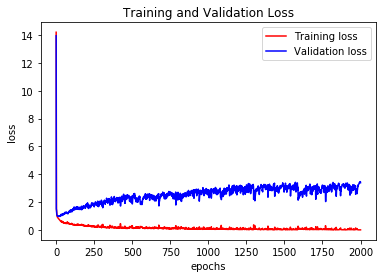

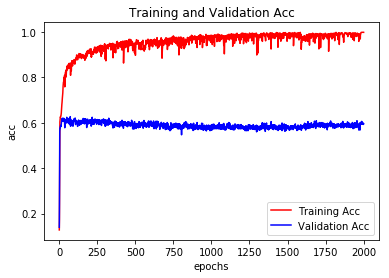

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend()
plt.show()


plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'r', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel('epochs')
plt.ylabel('acc')

plt.legend()
plt.show()

In [38]:
results = model.evaluate(x_test, y_test)
results


5000/5000 [==============================] - 0s 36us/step


[3.404834181022644, 0.581]

Well clearly we've overfit the crap out of our encoder I think - because with it we are getting fuck all on the validation improvement - so maybe let's not do that and cap it earlier